In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read the Excel file into a DataFrame
cwa = pd.read_excel('CwA Final Data.xlsx', sheet_name = 'CwA')

In [3]:
# Assuming 'treat' column is present in DataFrame cwa
countries_with_treat_value_1 = cwa[cwa['treat'] == 1]['Country'].unique()
countries_string = ', '.join(countries_with_treat_value_1)

# Printing the concatenated string
print(countries_string)


Benin, Burkina Faso, Cote d'Ivoire, Ethiopia, Ghana, Guinea, Rwanda, Senegal, Togo, Egypt, Arab Rep., Morocco, Tunisia


In [4]:
# List of country names
cwa_countries = ['Benin', 'Burkina Faso', "Cote d'Ivoire", 'Ethiopia', 'Ghana', 'Guinea', 'Rwanda', 'Senegal', 'Togo', 'Egypt, Arab Rep.', 'Morocco', 'Tunisia']

# Create a new column 'CwACountries' and set it to True if the country is in the specified list, otherwise False
cwa['CwACountries'] = cwa['Country'].isin(cwa_countries)

# Convert the boolean values to integers (0 and 1) to represent dummy variable
cwa['CwACountries'] = cwa['CwACountries'].astype(int)

# Display the DataFrame
print(cwa)


     id  Year  Country       Pop    TradeGDP  PolStability  GDPGrowth  \
0     1  2010   Angola  23364185  104.123648     -0.226182   4.398376   
1     1  2011   Angola  24259111   99.982506     -0.369238   3.472053   
2     1  2012   Angola  25188292   91.800097     -0.389323   8.542107   
3     1  2013   Angola  26147002   86.811933     -0.391233   4.954613   
4     1  2014   Angola  27128337   79.332923     -0.333232   4.822559   
..   ..   ...      ...       ...         ...           ...        ...   
541  48  2018  Tunisia  11933041  103.871824     -0.868882   2.624828   
542  48  2019  Tunisia  12049314  102.332615     -0.869923   1.588013   
543  48  2020  Tunisia  12161723   84.240772     -0.580146  -8.817879   
544  48  2021  Tunisia  12262946   94.352173     -0.695751   4.405362   
545  48  2022  Tunisia  12356117  107.395468      0.000000   2.521761   

        FDIInflow    FDIGDP  Inflation  ...    GDPperCap  UrbanPopT  treat  \
0   -3.227211e+09 -3.950098  14.469656  ...  

In [5]:
# Assuming cwa is your DataFrame
cwa['CovidDummy'] = cwa['Year'].apply(lambda x: 1 if x in [2021, 2022] else 0)

# Mean Imputation

In [6]:
# Define the list of columns to retain and apply mean imputation
columns_to_retain = ['id', 'Year', 'Country', 'treat', 'CwACountries', 'CovidDummy']

columns_to_impute = ['Pop', 'TradeGDP', 'PolStability', 'GDPGrowth', 'FDIInflow', 'FDIGDP', 'Inflation', 'ExchangeRate', 'ElectAccess', 
                     'GDPpCurrent', 'NetODA', 'NetODAGDP',  'GovtExpd', 'GCapForm', 'GDPDeflator', 'GDPpConstant', 'GDPGrowthn', 
                     'GDSavings', 'ConsumerPrices', 'Inflation consumer prices annual percent', 'Total Employed_millions', 'Invest nada', 
                     'NatRent', 'Control of corruption','Political Stability and Absence of violence or terrorism', 'Regulatory Quality', 
                     'Rule of Law', 'Voice and accountability', 'Gross capital formation percent of GDP',  'trade percent of gdp', 
                     'exports current usd', 'imports current usd', 'Employment-thousands-15', 'Employment-thousands-25', 
                     'Employment-to-population ratio-25', 'Employment-to-population ratio-15', 'Unem-25', 'NetTrade', 'NGrossCap', 
                     'GDPperCap', 'UrbanPopT', 'Government Effectiveness']

# Create a new DataFrame with selected columns from cwa_final
cwa_imp = cwa[columns_to_retain].copy()

# Replace zeros (0) with NaN in the specified columns
cwa[columns_to_impute] = cwa[columns_to_impute].replace(0, np.nan)

# Group by 'Country' and impute missing values with mean of each column within each country group
cwa_imp[columns_to_impute] = cwa.groupby('Country')[columns_to_impute].transform(lambda x: x.fillna(x.mean()))

print(cwa_imp)


     id  Year  Country  treat  CwACountries  CovidDummy       Pop    TradeGDP  \
0     1  2010   Angola      0             0           0  23364185  104.123648   
1     1  2011   Angola      0             0           0  24259111   99.982506   
2     1  2012   Angola      0             0           0  25188292   91.800097   
3     1  2013   Angola      0             0           0  26147002   86.811933   
4     1  2014   Angola      0             0           0  27128337   79.332923   
..   ..   ...      ...    ...           ...         ...       ...         ...   
541  48  2018  Tunisia      1             1           0  11933041  103.871824   
542  48  2019  Tunisia      1             1           0  12049314  102.332615   
543  48  2020  Tunisia      1             1           0  12161723   84.240772   
544  48  2021  Tunisia      1             1           1  12262946   94.352173   
545  48  2022  Tunisia      1             1           1  12356117  107.395468   

     PolStability  GDPGrowt

# Descriptive Stats

In [7]:
selected_columns = ['TradeGDP', 'PolStability', 'GDPGrowth', 'FDIInflow', 'FDIGDP', 'ExchangeRate', 'ElectAccess', 'GDPpCurrent', 'NetODA', 
                    'NetODAGDP', 'GovtExpd', 'GCapForm', 'GDPDeflator', 'GDPpConstant', 'GDPGrowthn', 'GDSavings', 'ConsumerPrices', 
                    'Inflation consumer prices annual percent', 'Invest nada', 'NatRent', 'Control of corruption', 
                    'Political Stability and Absence of violence or terrorism', 'Regulatory Quality', 'Rule of Law', 'Voice and accountability', 
                    'Gross capital formation percent of GDP', 'trade percent of gdp', 'exports current usd', 'imports current usd', 
                    'Employment-thousands-25', 'Employment-to-population ratio-25', 'Employment-to-population ratio-15',  'Unem-25', 
                    'NetTrade', 'NGrossCap', 'GDPperCap', 'UrbanPopT', 'CovidDummy', 'CwACountries']

# Select only the columns specified in selected_columns
cwa_selected = cwa_imp[selected_columns]

# Descriptive statistics for the overall DataFrame
cwa_descriptive_stats = cwa_selected.describe().T.reset_index()

# Printing the descriptive statistics
print("Descriptive statistics for the overall DataFrame:")
print(cwa_descriptive_stats)


Descriptive statistics for the overall DataFrame:
                                                index  count          mean  \
0                                            TradeGDP  546.0  6.731340e+01   
1                                        PolStability  546.0 -5.668278e-01   
2                                           GDPGrowth  546.0  3.623430e+00   
3                                           FDIInflow  546.0  1.071212e+09   
4                                              FDIGDP  546.0  3.821453e+00   
5                                        ExchangeRate  546.0  6.728952e+02   
6                                         ElectAccess  546.0  4.951487e+01   
7                                         GDPpCurrent  546.0  2.574652e+03   
8                                              NetODA  546.0  1.030216e+09   
9                                           NetODAGDP  546.0  5.688325e+00   
10                                           GovtExpd  546.0  1.490903e+01   
11            

PSM for FDI

In [10]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

# Copy the original DataFrame
cwa_b = cwa_imp.copy()

# List of covariates
control_vars = [
    'exports current usd', 'trade percent of gdp', 'imports current usd', 
    'Employment-to-population ratio-25', 'GDPpConstant', 'GDSavings', 'NatRent', 
    'GDPGrowth', 'Control of corruption', 'Inflation consumer prices annual percent', 
    'NetODA', 'Pop', 'UrbanPopT', 'ExchangeRate', 'Rule of Law', 'Government Effectiveness', 
    'Political Stability and Absence of violence or terrorism', 'GDPperCap', 'CovidDummy'
]

# Define outcome, treatment, and covariates
y = cwa_b['FDIInflow']
T = cwa_b['CwACountries']
X = cwa_b[control_vars]

# Filter data to the pre-treatment period (e.g., before 2017)
pre_treatment_data = cwa_b[cwa_b['Year'] <= 2016].copy()

# Ensure pre_treatment_data contains both classes
if pre_treatment_data['CwACountries'].nunique() == 1:
    raise ValueError("Pre-treatment data contains only one class, please check the data.")

# Calculate Propensity Scores for the pre-treatment period
logit = LogisticRegression(max_iter=1000)
logit.fit(pre_treatment_data[control_vars], pre_treatment_data[T.name])
propensity_scores_pre_treatment = logit.predict_proba(pre_treatment_data[control_vars])[:, 1]

# Add propensity scores to the pre-treatment DataFrame
pre_treatment_data['propensity_score_fdi'] = propensity_scores_pre_treatment

# Calculate Propensity Scores for the entire DataFrame
propensity_scores_all = logit.predict_proba(cwa_b[control_vars])[:, 1]

# Add propensity scores to the original DataFrame
cwa_b['propensity_score_fdi'] = propensity_scores_all

# Make the new dataframes accessible
print(cwa_b)


     id  Year  Country  treat  CwACountries  CovidDummy       Pop    TradeGDP  \
0     1  2010   Angola      0             0           0  23364185  104.123648   
1     1  2011   Angola      0             0           0  24259111   99.982506   
2     1  2012   Angola      0             0           0  25188292   91.800097   
3     1  2013   Angola      0             0           0  26147002   86.811933   
4     1  2014   Angola      0             0           0  27128337   79.332923   
..   ..   ...      ...    ...           ...         ...       ...         ...   
541  48  2018  Tunisia      1             1           0  11933041  103.871824   
542  48  2019  Tunisia      1             1           0  12049314  102.332615   
543  48  2020  Tunisia      1             1           0  12161723   84.240772   
544  48  2021  Tunisia      1             1           1  12262946   94.352173   
545  48  2022  Tunisia      1             1           1  12356117  107.395468   

     PolStability  GDPGrowt

PSM for invest nada

In [11]:
# Copy the original DataFrame
cwa_b1 = cwa_imp.copy()

# List of covariates
control_vars = [
    'exports current usd', 'trade percent of gdp', 'imports current usd', 
    'Employment-to-population ratio-25', 'GDPpConstant', 'GDSavings', 'NatRent', 
    'GDPGrowth', 'Control of corruption', 'Inflation consumer prices annual percent', 
    'NetODA', 'Pop', 'UrbanPopT', 'ExchangeRate', 'Rule of Law', 'Government Effectiveness', 
    'Political Stability and Absence of violence or terrorism', 'GDPperCap', 'CovidDummy'
]

# Define outcome, treatment, and covariates
y = cwa_b1['Invest nada']
T = cwa_b1['CwACountries']
X = cwa_b1[control_vars]

# Filter data to the pre-treatment period (e.g., before 2017)
pre_treatment_data_nada = cwa_b1[cwa_b1['Year'] <= 2016].copy()

# Ensure pre_treatment_data contains both classes
if pre_treatment_data_nada['CwACountries'].nunique() == 1:
    raise ValueError("Pre-treatment data contains only one class, please check the data.")

# Calculate Propensity Scores for the pre-treatment period
logit = LogisticRegression(max_iter=1000)
logit.fit(pre_treatment_data_nada[control_vars], pre_treatment_data_nada[T.name])
propensity_scores = logit.predict_proba(pre_treatment_data_nada[control_vars])[:, 1]

# Add propensity scores to the DataFrame
pre_treatment_data_nada['propensity_score'] = propensity_scores

# Calculate Propensity Scores for the entire DataFrame
propensity_scores_all = logit.predict_proba(cwa_b1[control_vars])[:, 1]

# Add propensity scores to the original DataFrame
cwa_b1['propensity_score'] = propensity_scores_all

# Make the new dataframes accessible
print(cwa_b1)


     id  Year  Country  treat  CwACountries  CovidDummy       Pop    TradeGDP  \
0     1  2010   Angola      0             0           0  23364185  104.123648   
1     1  2011   Angola      0             0           0  24259111   99.982506   
2     1  2012   Angola      0             0           0  25188292   91.800097   
3     1  2013   Angola      0             0           0  26147002   86.811933   
4     1  2014   Angola      0             0           0  27128337   79.332923   
..   ..   ...      ...    ...           ...         ...       ...         ...   
541  48  2018  Tunisia      1             1           0  11933041  103.871824   
542  48  2019  Tunisia      1             1           0  12049314  102.332615   
543  48  2020  Tunisia      1             1           0  12161723   84.240772   
544  48  2021  Tunisia      1             1           1  12262946   94.352173   
545  48  2022  Tunisia      1             1           1  12356117  107.395468   

     PolStability  GDPGrowt

PSM for Gross Cap Formation

In [13]:
# Copy the original DataFrame
cwa_c = cwa_imp.copy()

# Define outcome, treatment, and covariates
y = cwa_c['GCapForm']
T = cwa_c['CwACountries']
X = cwa_c[['trade percent of gdp', 'GDSavings', 'GDPGrowth', 'NatRent', 'UrbanPopT', 
           'GDPDeflator', 'NetTrade', 'Inflation consumer prices annual percent', 
           'ConsumerPrices', 'Political Stability and Absence of violence or terrorism', 
           'Government Effectiveness', 'Rule of Law', 'Pop', 
           'Employment-to-population ratio-25', 'Invest nada', 
           'GDPperCap', 'FDIInflow', 'CovidDummy']]

# Filter data to the pre-treatment period (e.g., before 2017)
pre_treatment_data_gcap = cwa_c[cwa_c['Year'] <= 2016].copy()

# Ensure pre_treatment_data contains both classes
if pre_treatment_data_gcap['CwACountries'].nunique() == 1:
    raise ValueError("Pre-treatment data contains only one class, please check the data.")

# Calculate Propensity Scores for the pre-treatment period
logit = LogisticRegression(max_iter=1000)
logit.fit(pre_treatment_data_gcap[X.columns], pre_treatment_data_gcap[T.name])
propensity_scores = logit.predict_proba(pre_treatment_data_gcap[X.columns])[:, 1]

# Add propensity scores to the DataFrame
pre_treatment_data_gcap['propensity_score'] = propensity_scores

# Calculate Propensity Scores for the entire DataFrame
propensity_scores_all = logit.predict_proba(cwa_c[X.columns])[:, 1]

# Add propensity scores to the original DataFrame
cwa_c['propensity_score'] = propensity_scores_all

# Make the new dataframes accessible
print(cwa_c)


     id  Year  Country  treat  CwACountries  CovidDummy       Pop    TradeGDP  \
0     1  2010   Angola      0             0           0  23364185  104.123648   
1     1  2011   Angola      0             0           0  24259111   99.982506   
2     1  2012   Angola      0             0           0  25188292   91.800097   
3     1  2013   Angola      0             0           0  26147002   86.811933   
4     1  2014   Angola      0             0           0  27128337   79.332923   
..   ..   ...      ...    ...           ...         ...       ...         ...   
541  48  2018  Tunisia      1             1           0  11933041  103.871824   
542  48  2019  Tunisia      1             1           0  12049314  102.332615   
543  48  2020  Tunisia      1             1           0  12161723   84.240772   
544  48  2021  Tunisia      1             1           1  12262946   94.352173   
545  48  2022  Tunisia      1             1           1  12356117  107.395468   

     PolStability  GDPGrowt

PSM for Employment

In [14]:
# Copy the original DataFrame
cwa_d = cwa_imp.copy()

# Define outcome, treatment, and covariates
y = cwa_d['Employment-to-population ratio-25']
T = cwa_d['CwACountries']
X = cwa_d[['Inflation consumer prices annual percent', 'GDPperCap', 'Political Stability and Absence of violence or terrorism', 
           'ExchangeRate', 'Pop', 'Government Effectiveness', 'UrbanPopT', 
           'ElectAccess', 'GovtExpd', 'Rule of Law', 'NatRent', 'Invest nada', 'GDPpConstant', 'GDPGrowth', 
           'Control of corruption', 'exports current usd', 'imports current usd', 'trade percent of gdp', 'FDIInflow', 'CovidDummy']]

# Filter data to the pre-treatment period (e.g., before 2017)
pre_treatment_data_emp = cwa_d[cwa_d['Year'] <= 2016].copy()

# Ensure pre_treatment_data contains both classes
if pre_treatment_data_emp['CwACountries'].nunique() == 1:
    raise ValueError("Pre-treatment data contains only one class, please check the data.")

# Calculate Propensity Scores for the pre-treatment period
logit = LogisticRegression(max_iter=1000)
logit.fit(pre_treatment_data_emp[X.columns], pre_treatment_data_emp[T.name])
propensity_scores = logit.predict_proba(pre_treatment_data_emp[X.columns])[:, 1]

# Add propensity scores to the DataFrame
pre_treatment_data_emp['propensity_score_emp'] = propensity_scores

# Calculate Propensity Scores for the entire DataFrame
propensity_scores_all = logit.predict_proba(cwa_d[X.columns])[:, 1]

# Add propensity scores to the original DataFrame
cwa_d['propensity_score_emp'] = propensity_scores_all

# Make the new dataframes accessible
print(cwa_d)


     id  Year  Country  treat  CwACountries  CovidDummy       Pop    TradeGDP  \
0     1  2010   Angola      0             0           0  23364185  104.123648   
1     1  2011   Angola      0             0           0  24259111   99.982506   
2     1  2012   Angola      0             0           0  25188292   91.800097   
3     1  2013   Angola      0             0           0  26147002   86.811933   
4     1  2014   Angola      0             0           0  27128337   79.332923   
..   ..   ...      ...    ...           ...         ...       ...         ...   
541  48  2018  Tunisia      1             1           0  11933041  103.871824   
542  48  2019  Tunisia      1             1           0  12049314  102.332615   
543  48  2020  Tunisia      1             1           0  12161723   84.240772   
544  48  2021  Tunisia      1             1           1  12262946   94.352173   
545  48  2022  Tunisia      1             1           1  12356117  107.395468   

     PolStability  GDPGrowt

PSM for GDP per capital

In [15]:
# Copy the original DataFrame
cwa_e = cwa_imp.copy()

# Define outcome, treatment, and covariates
y = cwa_e['GDPperCap']
T = cwa_e['CwACountries']
X = cwa_e[['ElectAccess', 'Voice and accountability', 'NatRent', 'Pop', 'exports current usd', 'UrbanPopT', 
           'GDSavings', 'imports current usd', 'NetODA', 'ExchangeRate', 'Employment-to-population ratio-25', 
           'Regulatory Quality', 'trade percent of gdp', 'GovtExpd', 'GCapForm', 
           'Inflation consumer prices annual percent', 'Rule of Law', 
           'Government Effectiveness', 'Political Stability and Absence of violence or terrorism', 
           'Control of corruption', 'GDPGrowth', 'FDIInflow', 'CovidDummy']]

# Filter data to the pre-treatment period (e.g., before 2017)
pre_treatment_data_gdp = cwa_e[cwa_e['Year'] <= 2016].copy()

# Ensure pre_treatment_data contains both classes
if pre_treatment_data_gdp['CwACountries'].nunique() == 1:
    raise ValueError("Pre-treatment data contains only one class, please check the data.")

# Calculate Propensity Scores for the pre-treatment period
logit = LogisticRegression(max_iter=1000)
logit.fit(pre_treatment_data_gdp[X.columns], pre_treatment_data_gdp[T.name])
propensity_scores = logit.predict_proba(pre_treatment_data_gdp[X.columns])[:, 1]

# Add propensity scores to the DataFrame
pre_treatment_data_gdp['propensity_score_gdp'] = propensity_scores

# Calculate Propensity Scores for the entire DataFrame
propensity_scores_all = logit.predict_proba(cwa_e[X.columns])[:, 1]

# Add propensity scores to the original DataFrame
cwa_e['propensity_score_gdp'] = propensity_scores_all

# Make the new dataframes accessible
print(cwa_e)


     id  Year  Country  treat  CwACountries  CovidDummy       Pop    TradeGDP  \
0     1  2010   Angola      0             0           0  23364185  104.123648   
1     1  2011   Angola      0             0           0  24259111   99.982506   
2     1  2012   Angola      0             0           0  25188292   91.800097   
3     1  2013   Angola      0             0           0  26147002   86.811933   
4     1  2014   Angola      0             0           0  27128337   79.332923   
..   ..   ...      ...    ...           ...         ...       ...         ...   
541  48  2018  Tunisia      1             1           0  11933041  103.871824   
542  48  2019  Tunisia      1             1           0  12049314  102.332615   
543  48  2020  Tunisia      1             1           0  12161723   84.240772   
544  48  2021  Tunisia      1             1           1  12262946   94.352173   
545  48  2022  Tunisia      1             1           1  12356117  107.395468   

     PolStability  GDPGrowt

PSM for Export

In [16]:
# Copy the original DataFrame
cwa_f = cwa_imp.copy()

# Define outcome, treatment, and covariates
y = cwa_f['exports current usd']
T = cwa_f['CwACountries']
X = cwa_f[['GDPpConstant', 'FDIInflow', 'trade percent of gdp', 'UrbanPopT', 'GDPperCap', 'GDSavings', 
           'ConsumerPrices', 'ElectAccess', 'NatRent', 'FDIGDP', 'GDPGrowth', 
           'ExchangeRate', 'Voice and accountability', 'Inflation consumer prices annual percent', 
           'Employment-to-population ratio-25', 'Control of corruption', 'Regulatory Quality', 
           'Political Stability and Absence of violence or terrorism', 'GovtExpd', 'Rule of Law', 
           'CovidDummy']]

# Filter data to the pre-treatment period (e.g., before 2017)
pre_treatment_data_expt = cwa_f[cwa_f['Year'] <= 2016].copy()

# Ensure pre_treatment_data contains both classes
if pre_treatment_data_expt['CwACountries'].nunique() == 1:
    raise ValueError("Pre-treatment data contains only one class, please check the data.")

# Calculate Propensity Scores for the pre-treatment period
logit = LogisticRegression(max_iter=1000)
logit.fit(pre_treatment_data_expt[X.columns], pre_treatment_data_expt[T.name])
propensity_scores = logit.predict_proba(pre_treatment_data_expt[X.columns])[:, 1]

# Add propensity scores to the DataFrame
pre_treatment_data_expt['propensity_score_expt'] = propensity_scores

# Calculate Propensity Scores for the entire DataFrame
propensity_scores_all = logit.predict_proba(cwa_f[X.columns])[:, 1]

# Add propensity scores to the original DataFrame
cwa_f['propensity_score_expt'] = propensity_scores_all

# Make the new dataframes accessible
print(cwa_f)


     id  Year  Country  treat  CwACountries  CovidDummy       Pop    TradeGDP  \
0     1  2010   Angola      0             0           0  23364185  104.123648   
1     1  2011   Angola      0             0           0  24259111   99.982506   
2     1  2012   Angola      0             0           0  25188292   91.800097   
3     1  2013   Angola      0             0           0  26147002   86.811933   
4     1  2014   Angola      0             0           0  27128337   79.332923   
..   ..   ...      ...    ...           ...         ...       ...         ...   
541  48  2018  Tunisia      1             1           0  11933041  103.871824   
542  48  2019  Tunisia      1             1           0  12049314  102.332615   
543  48  2020  Tunisia      1             1           0  12161723   84.240772   
544  48  2021  Tunisia      1             1           1  12262946   94.352173   
545  48  2022  Tunisia      1             1           1  12356117  107.395468   

     PolStability  GDPGrowt

In [ ]:
# moving forward, dataframe for ML model - cwa_b, cwa_b1, cwa_c, cwa_d, cwa_e, cwa_f

In [17]:
# Renaming 'propensity_score_fdi' to 'Propensity Score' in overall_cwa_fdi
cwa_b = cwa_b.rename(columns={'propensity_score_fdi': 'Propensity Score'})

# Renaming 'propensity_score' to 'Propensity Score' in overall_cwa_nada
cwa_b1 = cwa_b1.rename(columns={'propensity_score': 'Propensity Score'})

# Renaming 'propensity_score' to 'Propensity Score' in overall_cwa_gcap
cwa_c = cwa_c.rename(columns={'propensity_score': 'Propensity Score'})

# Renaming 'propensity_score_emp' to 'Propensity Score' in overall_cwa_emp
cwa_d = cwa_d.rename(columns={'propensity_score_emp': 'Propensity Score'})

# Renaming 'propensity_score_gdp' to 'Propensity Score' in overall_cwa_gdp
cwa_e = cwa_e.rename(columns={'propensity_score_gdp': 'Propensity Score'})

# Renaming 'propensity_score_expt' to 'Propensity Score' in overall_cwa_expt
cwa_f = cwa_f.rename(columns={'propensity_score_expt': 'Propensity Score'})

# Print heads to verify the changes
print(cwa_b.head())
print(cwa_b1.head())
print(cwa_c.head())
print(cwa_d.head())
print(cwa_e.head())
print(cwa_f.head())


   id  Year Country  treat  CwACountries  CovidDummy       Pop    TradeGDP  \
0   1  2010  Angola      0             0           0  23364185  104.123648   
1   1  2011  Angola      0             0           0  24259111   99.982506   
2   1  2012  Angola      0             0           0  25188292   91.800097   
3   1  2013  Angola      0             0           0  26147002   86.811933   
4   1  2014  Angola      0             0           0  27128337   79.332923   

   PolStability  GDPGrowth  ...  Employment-thousands-25  \
0     -0.226182   4.398376  ...                 6803.315   
1     -0.369238   3.472053  ...                 7208.399   
2     -0.389323   8.542107  ...                 7408.919   
3     -0.391233   4.954613  ...                 7612.989   
4     -0.333232   4.822559  ...                 7822.680   

   Employment-to-population ratio-25  Employment-to-population ratio-15  \
0                             83.234                             69.974   
1                   

Standardization - dataframe names: cwa_b, cwa_b1, cwa_c, cwa_d, cwa_e, cwa_f

In [ ]:
FDI

In [19]:
from sklearn.preprocessing import StandardScaler

# Assuming cwa_b is already loaded
cwa_b_copy = cwa_b.copy()

# Columns to exclude from standardization
exclude_columns = ['id', 'Year', 'Country', 'treat', 'CwACountries', 'CovidDummy']

# Identify columns to be standardized
columns_to_standardize = [col for col in cwa_b_copy.columns if col not in exclude_columns]

# Standardize the columns
scaler = StandardScaler()
standardized_data = scaler.fit_transform(cwa_b_copy[columns_to_standardize])

# Create a DataFrame with the standardized columns and add the _fdi suffix
standardized_df_fdi = pd.DataFrame(standardized_data, columns=columns_to_standardize)

# Concatenate the standardized columns with the original DataFrame
cwa_b_fdi_std = pd.concat([cwa_b_copy[exclude_columns], standardized_df_fdi], axis=1)

# Print the first few rows of the new DataFrame
print(cwa_b_fdi_std.head())


   id  Year Country  treat  CwACountries  CovidDummy       Pop  TradeGDP  \
0   1  2010  Angola      0             0           0 -0.088560  1.321338   
1   1  2011  Angola      0             0           0 -0.063730  1.172688   
2   1  2012  Angola      0             0           0 -0.037949  0.878973   
3   1  2013  Angola      0             0           0 -0.011349  0.699918   
4   1  2014  Angola      0             0           0  0.015879  0.431452   

   PolStability  GDPGrowth  ...  Employment-thousands-25  \
0      0.424207   0.182814  ...                -0.051006   
1      0.246060  -0.035711  ...                -0.010257   
2      0.221048   1.160344  ...                 0.009914   
3      0.218668   0.314034  ...                 0.030442   
4      0.290898   0.282881  ...                 0.051535   

   Employment-to-population ratio-25  Employment-to-population ratio-15  \
0                           1.130077                           0.979569   
1                           1.23

In [ ]:
FDI Nada

In [20]:
# Assuming cwa_b1 is already loaded
cwa_b1_copy = cwa_b1.copy()

# Columns to exclude from standardization
exclude_columns = ['id', 'Year', 'Country', 'treat', 'CwACountries', 'CovidDummy']

# Identify columns to be standardized
columns_to_standardize = [col for col in cwa_b1_copy.columns if col not in exclude_columns]

# Standardize the columns
scaler = StandardScaler()
standardized_data = scaler.fit_transform(cwa_b1_copy[columns_to_standardize])

# Create a DataFrame with the standardized columns and add the _nada suffix
standardized_df_nada = pd.DataFrame(standardized_data, columns=columns_to_standardize)

# Concatenate the standardized columns with the original DataFrame
cwa_b1_nada_std = pd.concat([cwa_b1_copy[exclude_columns], standardized_df_nada], axis=1)

# Print the first few rows of the new DataFrame
print(cwa_b1_nada_std.head())


   id  Year Country  treat  CwACountries  CovidDummy       Pop  TradeGDP  \
0   1  2010  Angola      0             0           0 -0.088560  1.321338   
1   1  2011  Angola      0             0           0 -0.063730  1.172688   
2   1  2012  Angola      0             0           0 -0.037949  0.878973   
3   1  2013  Angola      0             0           0 -0.011349  0.699918   
4   1  2014  Angola      0             0           0  0.015879  0.431452   

   PolStability  GDPGrowth  ...  Employment-thousands-25  \
0      0.424207   0.182814  ...                -0.051006   
1      0.246060  -0.035711  ...                -0.010257   
2      0.221048   1.160344  ...                 0.009914   
3      0.218668   0.314034  ...                 0.030442   
4      0.290898   0.282881  ...                 0.051535   

   Employment-to-population ratio-25  Employment-to-population ratio-15  \
0                           1.130077                           0.979569   
1                           1.23

In [ ]:
Gcap

In [21]:
# Assuming cwa_c is already loaded
cwa_c_copy = cwa_c.copy()

# Columns to exclude from standardization
exclude_columns = ['id', 'Year', 'Country', 'treat', 'CwACountries', 'CovidDummy']

# Identify columns to be standardized
columns_to_standardize = [col for col in cwa_c_copy.columns if col not in exclude_columns]

# Standardize the columns
scaler = StandardScaler()
standardized_data = scaler.fit_transform(cwa_c_copy[columns_to_standardize])

# Create a DataFrame with the standardized columns and add the _gcap suffix
standardized_df_gcap = pd.DataFrame(standardized_data, columns=columns_to_standardize)

# Concatenate the standardized columns with the original DataFrame
cwa_c_gcap_std = pd.concat([cwa_c_copy[exclude_columns], standardized_df_gcap], axis=1)

# Print the first few rows of the new DataFrame
print(cwa_c_gcap_std.head())


   id  Year Country  treat  CwACountries  CovidDummy       Pop  TradeGDP  \
0   1  2010  Angola      0             0           0 -0.088560  1.321338   
1   1  2011  Angola      0             0           0 -0.063730  1.172688   
2   1  2012  Angola      0             0           0 -0.037949  0.878973   
3   1  2013  Angola      0             0           0 -0.011349  0.699918   
4   1  2014  Angola      0             0           0  0.015879  0.431452   

   PolStability  GDPGrowth  ...  Employment-thousands-25  \
0      0.424207   0.182814  ...                -0.051006   
1      0.246060  -0.035711  ...                -0.010257   
2      0.221048   1.160344  ...                 0.009914   
3      0.218668   0.314034  ...                 0.030442   
4      0.290898   0.282881  ...                 0.051535   

   Employment-to-population ratio-25  Employment-to-population ratio-15  \
0                           1.130077                           0.979569   
1                           1.23

In [ ]:
Emp

In [22]:
# Assuming cwa_d is already loaded
cwa_d_copy = cwa_d.copy()

# Columns to exclude from standardization
exclude_columns = ['id', 'Year', 'Country', 'treat', 'CwACountries', 'CovidDummy']

# Identify columns to be standardized
columns_to_standardize = [col for col in cwa_d_copy.columns if col not in exclude_columns]

# Standardize the columns
scaler = StandardScaler()
standardized_data = scaler.fit_transform(cwa_d_copy[columns_to_standardize])

# Create a DataFrame with the standardized columns and add the _emp suffix
standardized_df_emp = pd.DataFrame(standardized_data, columns=columns_to_standardize)

# Concatenate the standardized columns with the original DataFrame
cwa_d_emp_std = pd.concat([cwa_d_copy[exclude_columns], standardized_df_emp], axis=1)

# Print the first few rows of the new DataFrame
print(cwa_d_emp_std.head())


   id  Year Country  treat  CwACountries  CovidDummy       Pop  TradeGDP  \
0   1  2010  Angola      0             0           0 -0.088560  1.321338   
1   1  2011  Angola      0             0           0 -0.063730  1.172688   
2   1  2012  Angola      0             0           0 -0.037949  0.878973   
3   1  2013  Angola      0             0           0 -0.011349  0.699918   
4   1  2014  Angola      0             0           0  0.015879  0.431452   

   PolStability  GDPGrowth  ...  Employment-thousands-25  \
0      0.424207   0.182814  ...                -0.051006   
1      0.246060  -0.035711  ...                -0.010257   
2      0.221048   1.160344  ...                 0.009914   
3      0.218668   0.314034  ...                 0.030442   
4      0.290898   0.282881  ...                 0.051535   

   Employment-to-population ratio-25  Employment-to-population ratio-15  \
0                           1.130077                           0.979569   
1                           1.23

In [ ]:
GDP

In [23]:
# Assuming cwa_e is already loaded
cwa_e_copy = cwa_e.copy()

# Columns to exclude from standardization
exclude_columns = ['id', 'Year', 'Country', 'treat', 'CwACountries', 'CovidDummy']

# Identify columns to be standardized
columns_to_standardize = [col for col in cwa_e_copy.columns if col not in exclude_columns]

# Standardize the columns
scaler = StandardScaler()
standardized_data = scaler.fit_transform(cwa_e_copy[columns_to_standardize])

# Create a DataFrame with the standardized columns and add the _gdp suffix
standardized_df_gdp = pd.DataFrame(standardized_data, columns=columns_to_standardize)

# Concatenate the standardized columns with the original DataFrame
cwa_e_gdp_std = pd.concat([cwa_e_copy[exclude_columns], standardized_df_gdp], axis=1)

# Print the first few rows of the new DataFrame
print(cwa_e_gdp_std.head())


   id  Year Country  treat  CwACountries  CovidDummy       Pop  TradeGDP  \
0   1  2010  Angola      0             0           0 -0.088560  1.321338   
1   1  2011  Angola      0             0           0 -0.063730  1.172688   
2   1  2012  Angola      0             0           0 -0.037949  0.878973   
3   1  2013  Angola      0             0           0 -0.011349  0.699918   
4   1  2014  Angola      0             0           0  0.015879  0.431452   

   PolStability  GDPGrowth  ...  Employment-thousands-25  \
0      0.424207   0.182814  ...                -0.051006   
1      0.246060  -0.035711  ...                -0.010257   
2      0.221048   1.160344  ...                 0.009914   
3      0.218668   0.314034  ...                 0.030442   
4      0.290898   0.282881  ...                 0.051535   

   Employment-to-population ratio-25  Employment-to-population ratio-15  \
0                           1.130077                           0.979569   
1                           1.23

In [ ]:
Export

In [24]:
# Assuming cwa_f is already loaded
cwa_f_copy = cwa_f.copy()

# Columns to exclude from standardization
exclude_columns = ['id', 'Year', 'Country', 'treat', 'CwACountries', 'CovidDummy']

# Identify columns to be standardized
columns_to_standardize = [col for col in cwa_f_copy.columns if col not in exclude_columns]

# Standardize the columns
scaler = StandardScaler()
standardized_data = scaler.fit_transform(cwa_f_copy[columns_to_standardize])

# Create a DataFrame with the standardized columns and add the _expt suffix
standardized_df_expt = pd.DataFrame(standardized_data, columns=columns_to_standardize)

# Concatenate the standardized columns with the original DataFrame
cwa_f_expt_std = pd.concat([cwa_f_copy[exclude_columns], standardized_df_expt], axis=1)

# Print the first few rows of the new DataFrame
print(cwa_f_expt_std.head())


   id  Year Country  treat  CwACountries  CovidDummy       Pop  TradeGDP  \
0   1  2010  Angola      0             0           0 -0.088560  1.321338   
1   1  2011  Angola      0             0           0 -0.063730  1.172688   
2   1  2012  Angola      0             0           0 -0.037949  0.878973   
3   1  2013  Angola      0             0           0 -0.011349  0.699918   
4   1  2014  Angola      0             0           0  0.015879  0.431452   

   PolStability  GDPGrowth  ...  Employment-thousands-25  \
0      0.424207   0.182814  ...                -0.051006   
1      0.246060  -0.035711  ...                -0.010257   
2      0.221048   1.160344  ...                 0.009914   
3      0.218668   0.314034  ...                 0.030442   
4      0.290898   0.282881  ...                 0.051535   

   Employment-to-population ratio-25  Employment-to-population ratio-15  \
0                           1.130077                           0.979569   
1                           1.23

# ML Estimation 

In [ ]:
cwa_b_fdi_std, cwa_b1_nada_std, cwa_c_gcap_std, cwa_d_emp_std, cwa_e_gdp_std, cwa_f_expt_std

# Modeling FDI net inflow

In [25]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier, RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
from statsmodels.api import add_constant, OLS
from sklearn.utils import resample
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Assuming overall_cwa_fdi is already loaded
df_fdi = cwa_b_fdi_std.copy()

# Define outcome, treatment, and covariates
y_fdi = df_fdi['FDIInflow']
A_fdi = df_fdi['CwACountries']
X_fdi = df_fdi[['exports current usd', 'trade percent of gdp', 'imports current usd', 'Employment-to-population ratio-15', 'GDPpConstant', 
                'GDSavings', 'NatRent', 'GDPGrowth', 'Control of corruption', 'Inflation consumer prices annual percent', 'NetODA', 
                'Pop', 'UrbanPopT', 'ExchangeRate', 'Rule of Law', 'Government Effectiveness', 
                'Political Stability and Absence of violence or terrorism', 'GDPperCap', 'CovidDummy']]


In [26]:
def compute_tmle_estimate_fdi(df, outcome_model, treatment_model):
    y_fdi = df['FDIInflow']
    A_fdi = df['CwACountries']
    X_fdi = df[['exports current usd', 'trade percent of gdp', 'imports current usd', 'Employment-to-population ratio-15', 'GDPpConstant', 
                'GDSavings', 'NatRent', 'GDPGrowth', 'Control of corruption', 'Inflation consumer prices annual percent', 'NetODA', 
                'Pop', 'UrbanPopT', 'ExchangeRate', 'Rule of Law', 'Government Effectiveness', 
                'Political Stability and Absence of violence or terrorism', 'GDPperCap', 'CovidDummy']]
    P_fdi = df['Propensity Score']

    # Split data for cross-fitting
    X_train_fdi, X_test_fdi, y_train_fdi, y_test_fdi, A_train_fdi, A_test_fdi, P_train_fdi, P_test_fdi = train_test_split(X_fdi, y_fdi, A_fdi, P_fdi, test_size=0.2, random_state=42)

    # Initial Outcome Model
    outcome_model.fit(pd.concat([X_train_fdi, A_train_fdi], axis=1), y_train_fdi)
    y_hat_fdi = outcome_model.predict(pd.concat([X_test_fdi, A_test_fdi], axis=1))

    # Initial Treatment Model
    treatment_model.fit(X_train_fdi, A_train_fdi)
    A_hat_fdi = P_test_fdi  

    # Compute clever covariate
    clever_covariate_fdi = A_test_fdi - A_hat_fdi

    # Update the initial outcome model
    epsilon_model_fdi = OLS(y_test_fdi, add_constant(clever_covariate_fdi)).fit()
    epsilon_fdi = epsilon_model_fdi.params.iloc[1]  # Use iloc to access by position

    # Update the predicted outcome
    y_star_fdi = y_hat_fdi + epsilon_fdi * clever_covariate_fdi

    # Estimate the treatment effect
    treatment_effect_fdi = np.mean(y_star_fdi[A_test_fdi == 1]) - np.mean(y_star_fdi[A_test_fdi == 0])
    
    # Calculate p-value
    p_value_fdi = epsilon_model_fdi.pvalues.iloc[1]
    
    return treatment_effect_fdi, y_test_fdi, y_star_fdi, p_value_fdi


In [27]:
def bootstrap_tmle_fdi(df, outcome_model, treatment_model, n_iterations=1000):
    bootstrap_estimates_fdi = []
    p_values_fdi = []
    r_squared_values_fdi = []
    rmse_values_fdi = []
    mae_values_fdi = []

    for i in range(n_iterations):
        sample_df_fdi = resample(df)
        treatment_effect_fdi, y_test_sample_fdi, y_star_sample_fdi, p_value_fdi = compute_tmle_estimate_fdi(sample_df_fdi, outcome_model, treatment_model)
        bootstrap_estimates_fdi.append(treatment_effect_fdi)
        p_values_fdi.append(p_value_fdi)
        r_squared_fdi = r2_score(y_test_sample_fdi, y_star_sample_fdi)
        rmse_fdi = np.sqrt(mean_squared_error(y_test_sample_fdi, y_star_sample_fdi))
        mae_fdi = mean_absolute_error(y_test_sample_fdi, y_star_sample_fdi)
        r_squared_values_fdi.append(r_squared_fdi)
        rmse_values_fdi.append(rmse_fdi)
        mae_values_fdi.append(mae_fdi)

    # Calculate the mean and standard error of bootstrap estimates
    bootstrap_mean_fdi = np.mean(bootstrap_estimates_fdi)
    bootstrap_se_fdi = np.std(bootstrap_estimates_fdi)

    # Calculate the 95% confidence interval
    lower_ci_fdi = np.percentile(bootstrap_estimates_fdi, 2.5)
    upper_ci_fdi = np.percentile(bootstrap_estimates_fdi, 97.5)

    # Calculate the mean R-squared, RMSE, and MAE values
    mean_r_squared_fdi = np.mean(r_squared_values_fdi)
    mean_rmse_fdi = np.mean(rmse_values_fdi)
    mean_mae_fdi = np.mean(mae_values_fdi)
    
    # Calculate mean p-value
    mean_p_value_fdi = np.mean(p_values_fdi)

    return {
        'Estimated Treatment Effect': bootstrap_mean_fdi,
        'Bootstrap Standard Error': bootstrap_se_fdi,
        '95% Confidence Interval Lower Bound': lower_ci_fdi,
        '95% Confidence Interval Upper Bound': upper_ci_fdi,
        'Mean R-Squared': mean_r_squared_fdi,
        'Mean RMSE': mean_rmse_fdi,
        'Mean MAE': mean_mae_fdi,
        'Mean P-Value': mean_p_value_fdi
    }


In [28]:
models_fdi = {
    'Gradient Boosting': (GradientBoostingRegressor(n_estimators=100, random_state=42), GradientBoostingClassifier(n_estimators=100, random_state=42)),
    'Random Forest': (RandomForestRegressor(n_estimators=100, random_state=42), RandomForestClassifier(n_estimators=100, random_state=42)),
    'XGBoost': (XGBRegressor(n_estimators=100, random_state=42), XGBClassifier(n_estimators=100, random_state=42))
}

results_fdi = []

for model_name_fdi, (outcome_model_fdi, treatment_model_fdi) in models_fdi.items():
    result_fdi = bootstrap_tmle_fdi(df_fdi, outcome_model_fdi, treatment_model_fdi)
    result_fdi['Model'] = model_name_fdi
    results_fdi.append(result_fdi)

results_fdi_df = pd.DataFrame(results_fdi, columns=[
    'Model', 'Estimated Treatment Effect', 'Bootstrap Standard Error',
    '95% Confidence Interval Lower Bound', '95% Confidence Interval Upper Bound',
    'Mean R-Squared', 'Mean RMSE', 'Mean MAE', 'Mean P-Value'
])

print(results_fdi_df)


               Model  Estimated Treatment Effect  Bootstrap Standard Error  \
0  Gradient Boosting                    0.723636                  0.270744   
1      Random Forest                    0.736552                  0.265273   
2            XGBoost                    0.726486                  0.265263   

   95% Confidence Interval Lower Bound  95% Confidence Interval Upper Bound  \
0                             0.233628                             1.278157   
1                             0.268786                             1.315432   
2                             0.253218                             1.318775   

   Mean R-Squared  Mean RMSE  Mean MAE  Mean P-Value  
0        0.167829   0.712547  0.419437      0.000151  
1        0.311801   0.675690  0.412274      0.000084  
2        0.307871   0.667426  0.406766      0.000077  


In [ ]:
Plotting

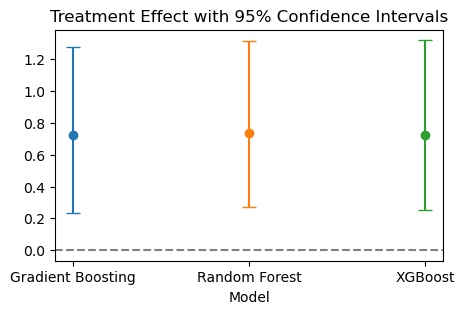

In [29]:
import matplotlib.pyplot as plt

def plot_treatment_effects(results_fdi, filename):
    plt.figure(figsize=(5, 3))
    for i, row in results_fdi.iterrows():
        plt.errorbar(x=row['Model'], y=row['Estimated Treatment Effect'],
                     yerr=[[row['Estimated Treatment Effect'] - row['95% Confidence Interval Lower Bound']],
                           [row['95% Confidence Interval Upper Bound'] - row['Estimated Treatment Effect']]],
                     fmt='o', capsize=5, label=row['Model'])
    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel('Model')
    plt.title('Treatment Effect with 95% Confidence Intervals')

    # Add suffix _fdi to the filename
    filename_with_suffix = filename.replace('.png', '_fdi.png')
    plt.savefig(filename_with_suffix)
    plt.show()

# Example usage:
plot_treatment_effects(results_fdi_df, 'treatment_effects_plot_fdi.png')


In [ ]:
Residual Plot

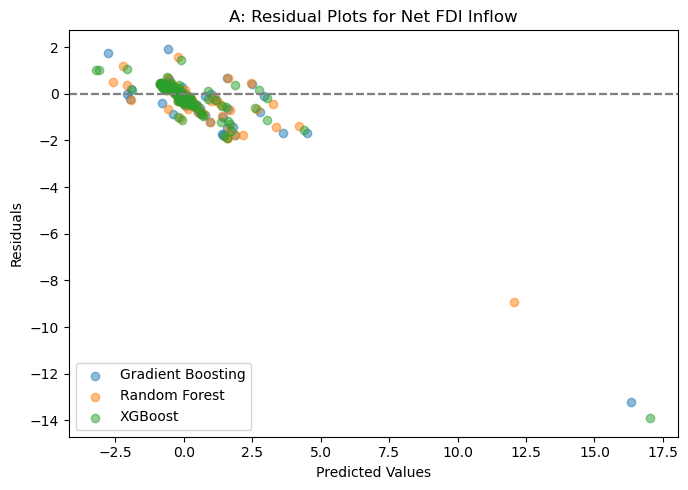

In [30]:
import matplotlib.pyplot as plt

def plot_residuals(y_test_fdi, y_star_fdi, model_name_fdi, ax_fdi):
    residuals_fdi = y_test_fdi - y_star_fdi
    ax_fdi.scatter(y_star_fdi, residuals_fdi, alpha=0.5, label=model_name_fdi)
    ax_fdi.axhline(0, color='gray', linestyle='--')
    ax_fdi.set_xlabel('Predicted Values')
    ax_fdi.set_ylabel('Residuals')

# Assuming you have three models in the 'models_fdi' dictionary
fig_fdi, ax_fdi = plt.subplots(figsize=(7, 5)) 

for model_name_fdi, (outcome_model_fdi, treatment_model_fdi) in models_fdi.items():
    treatment_effect_fdi, y_test_fdi, y_star_fdi, _ = compute_tmle_estimate_fdi(df_fdi, outcome_model_fdi, treatment_model_fdi)
    plot_residuals(y_test_fdi, y_star_fdi, model_name_fdi, ax_fdi)

ax_fdi.set_title('A: Residual Plots for Net FDI Inflow')
ax_fdi.legend(title=None) 
plt.tight_layout()
plt.savefig('residual_plots_fdi.png')
plt.show()

# Invest nada - FDI Inflow

In [32]:
# Assuming overall_cwa_nada_std is already loaded
df_nada = cwa_b1_nada_std.copy()

# Define outcome, treatment, and covariates
y_nada = df_nada['Invest nada']
A_nada = df_nada['CwACountries']
X_nada = df_nada[['exports current usd', 'trade percent of gdp', 'imports current usd', 
                'Employment-to-population ratio-15', 'GDPpConstant', 'GDSavings', 'NatRent', 
                'GDPGrowth', 'Control of corruption', 
                'Inflation consumer prices annual percent', 'NetODA', 
                'Pop', 'UrbanPopT', 'ExchangeRate', 'Rule of Law', 'Government Effectiveness', 
                'Political Stability and Absence of violence or terrorism', 'GDPperCap', 
                'CovidDummy']]
P_nada = df_nada['Propensity Score']

In [33]:
def compute_tmle_estimate_nada(df, outcome_model, treatment_model):
    y_nada = df['Invest nada']
    A_nada = df['CwACountries']
    X_nada = df[['exports current usd', 'trade percent of gdp', 'imports current usd', 
                'Employment-to-population ratio-15', 'GDPpConstant', 'GDSavings', 'NatRent', 
                'GDPGrowth', 'Control of corruption', 
                'Inflation consumer prices annual percent', 'NetODA', 
                'Pop', 'UrbanPopT', 'ExchangeRate', 'Rule of Law', 'Government Effectiveness', 
                'Political Stability and Absence of violence or terrorism', 'GDPperCap', 
                'CovidDummy']]
    P_nada = df['Propensity Score']

    # Split data for cross-fitting
    X_train_nada, X_test_nada, y_train_nada, y_test_nada, A_train_nada, A_test_nada, P_train_nada, P_test_nada = train_test_split(X_nada, y_nada, A_nada, P_nada, test_size=0.2)

    # Initial Outcome Model
    outcome_model.fit(pd.concat([X_train_nada, A_train_nada], axis=1), y_train_nada)
    y_hat_nada = outcome_model.predict(pd.concat([X_test_nada, A_test_nada], axis=1))

    # Initial Treatment Model
    treatment_model.fit(X_train_nada, A_train_nada)
    A_hat_nada = P_test_nada 

    # Compute clever covariate
    clever_covariate_nada = A_test_nada - A_hat_nada

    # Update the initial outcome model
    epsilon_model_nada = OLS(y_test_nada, add_constant(clever_covariate_nada)).fit()
    epsilon_nada = epsilon_model_nada.params.iloc[1]  # Use iloc to access by position

    # Update the predicted outcome
    y_star_nada = y_hat_nada + epsilon_nada * clever_covariate_nada

    # Estimate the treatment effect
    treatment_effect_nada = np.mean(y_star_nada[A_test_nada == 1]) - np.mean(y_star_nada[A_test_nada == 0])
    
    # Calculate p-value
    p_value_nada = epsilon_model_nada.pvalues.iloc[1]
    
    return treatment_effect_nada, y_test_nada, y_star_nada, p_value_nada


In [34]:
def bootstrap_tmle_nada(df, outcome_model, treatment_model, n_iterations=1000):
    bootstrap_estimates_nada = []
    p_values_nada = []
    r_squared_values_nada = []
    rmse_values_nada = []
    mae_values_nada = []

    for i in range(n_iterations):
        sample_df_nada = resample(df)
        treatment_effect_nada, y_test_sample_nada, y_star_sample_nada, p_value_nada = compute_tmle_estimate_nada(sample_df_nada, outcome_model, treatment_model)
        bootstrap_estimates_nada.append(treatment_effect_nada)
        p_values_nada.append(p_value_nada)
        r_squared_nada = r2_score(y_test_sample_nada, y_star_sample_nada)
        rmse_nada = np.sqrt(mean_squared_error(y_test_sample_nada, y_star_sample_nada))
        mae_nada = mean_absolute_error(y_test_sample_nada, y_star_sample_nada)
        r_squared_values_nada.append(r_squared_nada)
        rmse_values_nada.append(rmse_nada)
        mae_values_nada.append(mae_nada)

    # Calculate the mean and standard error of bootstrap estimates
    bootstrap_mean_nada = np.mean(bootstrap_estimates_nada)
    bootstrap_se_nada = np.std(bootstrap_estimates_nada)

    # Calculate the 95% confidence interval
    lower_ci_nada = np.percentile(bootstrap_estimates_nada, 2.5)
    upper_ci_nada = np.percentile(bootstrap_estimates_nada, 97.5)

    # Calculate the mean R-squared, RMSE, and MAE values
    mean_r_squared_nada = np.mean(r_squared_values_nada)
    mean_rmse_nada = np.mean(rmse_values_nada)
    mean_mae_nada = np.mean(mae_values_nada)
    
    # Calculate mean p-value
    mean_p_value_nada = np.mean(p_values_nada)

    return {
        'Estimated Treatment Effect': bootstrap_mean_nada,
        'Bootstrap Standard Error': bootstrap_se_nada,
        '95% Confidence Interval Lower Bound': lower_ci_nada,
        '95% Confidence Interval Upper Bound': upper_ci_nada,
        'Mean R-Squared': mean_r_squared_nada,
        'Mean RMSE': mean_rmse_nada,
        'Mean MAE': mean_mae_nada,
        'Mean P-Value': mean_p_value_nada
    }


In [35]:
models_nada = {
    'Gradient Boosting': (GradientBoostingRegressor(n_estimators=100, random_state=42), GradientBoostingClassifier(n_estimators=100, random_state=42)),
    'Random Forest': (RandomForestRegressor(n_estimators=100, random_state=42), RandomForestClassifier(n_estimators=100, random_state=42)),
    'XGBoost': (XGBRegressor(n_estimators=100, random_state=42), XGBClassifier(n_estimators=100, random_state=42))
}

results_nada = []

for model_name_nada, (outcome_model_nada, treatment_model_nada) in models_nada.items():
    result_nada = bootstrap_tmle_nada(df_nada, outcome_model_nada, treatment_model_nada)
    result_nada['Model'] = model_name_nada
    results_nada.append(result_nada)

results_nada_df = pd.DataFrame(results_nada, columns=[
    'Model', 'Estimated Treatment Effect', 'Bootstrap Standard Error',
    '95% Confidence Interval Lower Bound', '95% Confidence Interval Upper Bound',
    'Mean R-Squared', 'Mean RMSE', 'Mean MAE', 'Mean P-Value'
])

print(results_nada_df)

               Model  Estimated Treatment Effect  Bootstrap Standard Error  \
0  Gradient Boosting                    0.744371                  0.278669   
1      Random Forest                    0.754248                  0.270786   
2            XGBoost                    0.757624                  0.289928   

   95% Confidence Interval Lower Bound  95% Confidence Interval Upper Bound  \
0                             0.293222                             1.331664   
1                             0.255069                             1.287839   
2                             0.253586                             1.383164   

   Mean R-Squared  Mean RMSE  Mean MAE  Mean P-Value  
0        0.201305   0.698133  0.423096      0.000067  
1        0.291424   0.706233  0.428898      0.000064  
2        0.291132   0.687857  0.420157      0.000064  


In [ ]:
Plotting

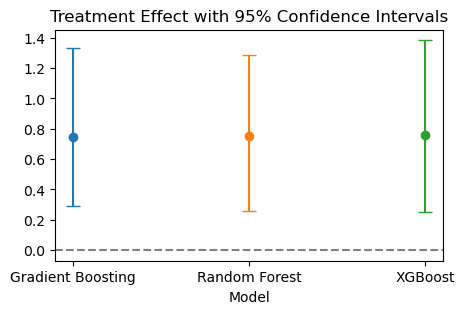

In [36]:
def plot_treatment_effects(results_nada, filename):
    plt.figure(figsize=(5, 3))
    for i, row in results_nada.iterrows():
        yerr_lower = row['Estimated Treatment Effect'] - row['95% Confidence Interval Lower Bound']
        yerr_upper = row['95% Confidence Interval Upper Bound'] - row['Estimated Treatment Effect']
        yerr = [[max(0, yerr_lower)], [max(0, yerr_upper)]]
        
        plt.errorbar(x=row['Model'], y=row['Estimated Treatment Effect'],
                     yerr=yerr,
                     fmt='o', capsize=5, label=row['Model'])
    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel('Model')
    plt.title('Treatment Effect with 95% Confidence Intervals')


    # Add suffix _nada to the filename
    filename_with_suffix = filename.replace('.png', '_nada.png')
    plt.savefig(filename_with_suffix)
    plt.show()

# Example usage:
plot_treatment_effects(results_nada_df, 'treatment_effects_plot_nada.png')


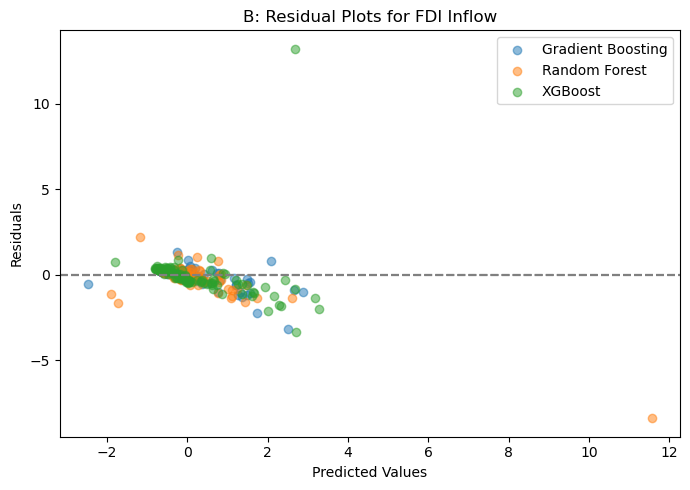

In [37]:
import matplotlib.pyplot as plt

def plot_residuals(y_test_nada, y_star_nada, model_name_nada, ax_nada):
    residuals_nada = y_test_nada - y_star_nada
    ax_nada.scatter(y_star_nada, residuals_nada, alpha=0.5, label=model_name_nada)
    ax_nada.axhline(0, color='gray', linestyle='--')
    ax_nada.set_xlabel('Predicted Values')
    ax_nada.set_ylabel('Residuals')

# Assuming you have three models in the 'models_nada' dictionary
fig_nada, ax_nada = plt.subplots(figsize=(7, 5)) 

for model_name_nada, (outcome_model_nada, treatment_model_nada) in models_nada.items():
    treatment_effect_nada, y_test_nada, y_star_nada, _ = compute_tmle_estimate_nada(df_nada, outcome_model_nada, treatment_model_nada)
    plot_residuals(y_test_nada, y_star_nada, model_name_nada, ax_nada)

ax_nada.set_title('B: Residual Plots for FDI Inflow')
ax_nada.legend(title=None) 
plt.tight_layout()
plt.savefig('residual_plots_nada.png')
plt.show()


# Gross Capital formation

In [38]:
# Assuming overall_cwa_gcap_std is already loaded
df_gcap = cwa_c_gcap_std.copy()

# Define outcome, treatment, and covariates
y_gcap = df_gcap['GCapForm']
A_gcap = df_gcap['CwACountries']
X_gcap = df_gcap[['trade percent of gdp', 'GDSavings', 'GDPGrowth', 'NatRent', 'UrbanPopT', 'GDPDeflator', 'NetTrade', 
                  'Inflation consumer prices annual percent', 'ConsumerPrices', 'Political Stability and Absence of violence or terrorism', 
                  'Government Effectiveness', 'Rule of Law', 'Pop', 'Employment-to-population ratio-15', 'Invest nada', 'GDPperCap', 
                  'FDIInflow', 'CovidDummy']]
P_gcap = df_gcap['Propensity Score']


In [39]:
def compute_tmle_estimate_gcap(df, outcome_model, treatment_model):
    y_gcap = df['GCapForm']
    A_gcap = df['CwACountries']
    X_gcap = df[['trade percent of gdp', 'GDSavings', 'GDPGrowth', 'NatRent', 'UrbanPopT', 'GDPDeflator', 'NetTrade', 
                 'Inflation consumer prices annual percent', 'ConsumerPrices', 'Political Stability and Absence of violence or terrorism', 
                 'Government Effectiveness', 'Rule of Law', 'Pop', 'Employment-to-population ratio-15', 'Invest nada', 'GDPperCap', 
                 'FDIInflow', 'CovidDummy']]
    P_gcap = df['Propensity Score']

    # Split data for cross-fitting
    X_train_gcap, X_test_gcap, y_train_gcap, y_test_gcap, A_train_gcap, A_test_gcap, P_train_gcap, P_test_gcap = train_test_split(
        X_gcap, y_gcap, A_gcap, P_gcap, test_size=0.2, random_state=42)

    # Initial Outcome Model
    outcome_model.fit(pd.concat([X_train_gcap, A_train_gcap], axis=1), y_train_gcap)
    y_hat_gcap = outcome_model.predict(pd.concat([X_test_gcap, A_test_gcap], axis=1))

    # Compute clever covariate
    clever_covariate_gcap = A_test_gcap - P_test_gcap

    # Update the initial outcome model
    epsilon_model_gcap = OLS(y_test_gcap, add_constant(clever_covariate_gcap)).fit()
    epsilon_gcap = epsilon_model_gcap.params.iloc[1]  # Use iloc to access by position

    # Update the predicted outcome
    y_star_gcap = y_hat_gcap + epsilon_gcap * clever_covariate_gcap

    # Estimate the treatment effect
    treatment_effect_gcap = np.mean(y_star_gcap[A_test_gcap == 1]) - np.mean(y_star_gcap[A_test_gcap == 0])
    
    # Calculate p-value
    p_value_gcap = epsilon_model_gcap.pvalues.iloc[1]
    
    return treatment_effect_gcap, y_test_gcap, y_star_gcap, p_value_gcap


In [40]:
def bootstrap_tmle_gcap(df, outcome_model, treatment_model, n_iterations=1000):
    bootstrap_estimates_gcap = []
    p_values_gcap = []
    r_squared_values_gcap = []
    rmse_values_gcap = []
    mae_values_gcap = []

    for i in range(n_iterations):
        sample_df_gcap = resample(df)
        treatment_effect_gcap, y_test_sample_gcap, y_star_sample_gcap, p_value_gcap = compute_tmle_estimate_gcap(sample_df_gcap, outcome_model, treatment_model)
        bootstrap_estimates_gcap.append(treatment_effect_gcap)
        p_values_gcap.append(p_value_gcap)
        r_squared_gcap = r2_score(y_test_sample_gcap, y_star_sample_gcap)
        rmse_gcap = np.sqrt(mean_squared_error(y_test_sample_gcap, y_star_sample_gcap))
        mae_gcap = mean_absolute_error(y_test_sample_gcap, y_star_sample_gcap)
        r_squared_values_gcap.append(r_squared_gcap)
        rmse_values_gcap.append(rmse_gcap)
        mae_values_gcap.append(mae_gcap)

    # Calculate the mean and standard error of bootstrap estimates
    bootstrap_mean_gcap = np.mean(bootstrap_estimates_gcap)
    bootstrap_se_gcap = np.std(bootstrap_estimates_gcap)

    # Calculate the 95% confidence interval
    lower_ci_gcap = np.percentile(bootstrap_estimates_gcap, 2.5)
    upper_ci_gcap = np.percentile(bootstrap_estimates_gcap, 97.5)

    # Calculate the mean R-squared, RMSE, and MAE values
    mean_r_squared_gcap = np.mean(r_squared_values_gcap)
    mean_rmse_gcap = np.mean(rmse_values_gcap)
    mean_mae_gcap = np.mean(mae_values_gcap)
    
    # Calculate mean p-value
    mean_p_value_gcap = np.mean(p_values_gcap)

    return {
        'Estimated Treatment Effect': bootstrap_mean_gcap,
        'Bootstrap Standard Error': bootstrap_se_gcap,
        '95% Confidence Interval Lower Bound': lower_ci_gcap,
        '95% Confidence Interval Upper Bound': upper_ci_gcap,
        'Mean R-Squared': mean_r_squared_gcap,
        'Mean RMSE': mean_rmse_gcap,
        'Mean MAE': mean_mae_gcap,
        'Mean P-Value': mean_p_value_gcap
    }


In [41]:
models_gcap = {
    'Gradient Boosting': (GradientBoostingRegressor(n_estimators=100, random_state=42), GradientBoostingClassifier(n_estimators=100, random_state=42)),
    'Random Forest': (RandomForestRegressor(n_estimators=100, random_state=42), RandomForestClassifier(n_estimators=100, random_state=42)),
    'XGBoost': (XGBRegressor(n_estimators=100, random_state=42), XGBClassifier(n_estimators=100, random_state=42))
}

results_gcap = []

for model_name_gcap, (outcome_model_gcap, treatment_model_gcap) in models_gcap.items():
    result_gcap = bootstrap_tmle_gcap(df_gcap, outcome_model_gcap, treatment_model_gcap)
    result_gcap['Model'] = model_name_gcap
    results_gcap.append(result_gcap)

results_gcap_df = pd.DataFrame(results_gcap, columns=[
    'Model', 'Estimated Treatment Effect', 'Bootstrap Standard Error',
    '95% Confidence Interval Lower Bound', '95% Confidence Interval Upper Bound',
    'Mean R-Squared', 'Mean RMSE', 'Mean MAE', 'Mean P-Value'
])

print(results_gcap_df)


               Model  Estimated Treatment Effect  Bootstrap Standard Error  \
0  Gradient Boosting                    0.021590                  0.215502   
1      Random Forest                    0.010776                  0.219689   
2            XGBoost                    0.019756                  0.226487   

   95% Confidence Interval Lower Bound  95% Confidence Interval Upper Bound  \
0                            -0.371079                             0.458571   
1                            -0.416618                             0.451033   
2                            -0.432910                             0.465123   

   Mean R-Squared  Mean RMSE  Mean MAE  Mean P-Value  
0        0.836091   0.391567  0.253255      0.503633  
1        0.828497   0.404905  0.241744      0.509031  
2        0.836421   0.390856  0.204094      0.516297  


In [ ]:
Plotting

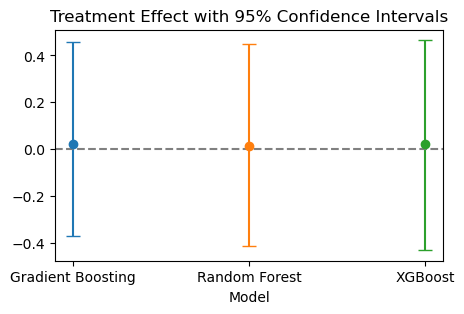

In [42]:
def plot_treatment_effects(results_gcap, filename):
    plt.figure(figsize=(5, 3))
    for i, row in results_gcap.iterrows():
        plt.errorbar(x=row['Model'], y=row['Estimated Treatment Effect'],
                     yerr=[[row['Estimated Treatment Effect'] - row['95% Confidence Interval Lower Bound']],
                           [row['95% Confidence Interval Upper Bound'] - row['Estimated Treatment Effect']]],
                     fmt='o', capsize=5, label=row['Model'])
    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel('Model')
    plt.title('Treatment Effect with 95% Confidence Intervals')

    # Add suffix _gcap to the filename
    filename_with_suffix = filename.replace('.png', '_gcap.png')
    plt.savefig(filename_with_suffix)
    plt.show()

# Example usage:
plot_treatment_effects(results_gcap_df, 'treatment_effects_plot_gcap.png')


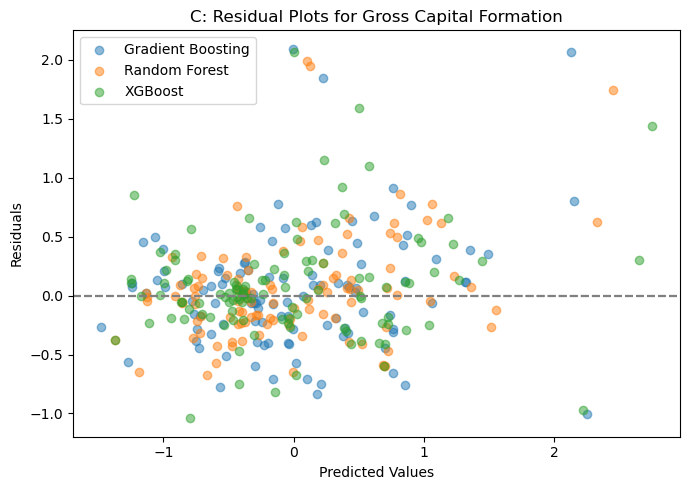

In [43]:
def plot_residuals_gcap(y_test_gcap, y_star_gcap, model_name_gcap, ax_gcap):
    residuals_gcap = y_test_gcap - y_star_gcap
    ax_gcap.scatter(y_star_gcap, residuals_gcap, alpha=0.5, label=model_name_gcap)
    ax_gcap.axhline(0, color='gray', linestyle='--')
    ax_gcap.set_xlabel('Predicted Values')
    ax_gcap.set_ylabel('Residuals')

# Assuming you have three models in the 'models_gcap' dictionary
fig_gcap, ax_gcap = plt.subplots(figsize=(7, 5))

for model_name_gcap, (outcome_model_gcap, treatment_model_gcap) in models_gcap.items():
    treatment_effect_gcap, y_test_gcap, y_star_gcap, _ = compute_tmle_estimate_gcap(df_gcap, outcome_model_gcap, treatment_model_gcap)
    plot_residuals_gcap(y_test_gcap, y_star_gcap, model_name_gcap, ax_gcap)

ax_gcap.set_title('C: Residual Plots for Gross Capital Formation')
ax_gcap.legend(title=None)
plt.tight_layout()
plt.savefig('residual_plots_gcap.png')
plt.show()


# Employment

In [44]:
# Assuming overall_cwa_emp_std is already loaded
df_emp = cwa_d_emp_std.copy()

# Define outcome, treatment, and covariates
y_emp = df_emp['Employment-to-population ratio-15']
A_emp = df_emp['CwACountries']
X_emp = df_emp[['Inflation consumer prices annual percent', 'GDPperCap', 'Political Stability and Absence of violence or terrorism', 
                'ExchangeRate', 'Pop', 'Government Effectiveness', 'UrbanPopT', 'ElectAccess', 'GovtExpd', 'Rule of Law', 'NatRent', 
                'Invest nada', 'GDPpConstant', 'GDPGrowth', 'Control of corruption', 'exports current usd', 'imports current usd', 
                'trade percent of gdp', 'FDIInflow', 'CovidDummy']]
P_emp = df_emp['Propensity Score']


In [45]:
def compute_tmle_estimate_emp(df, outcome_model, treatment_model):
    y_emp = df['Employment-to-population ratio-15']
    A_emp = df['CwACountries']
    X_emp = df[['Inflation consumer prices annual percent', 'GDPperCap', 'Political Stability and Absence of violence or terrorism', 
                'ExchangeRate', 'Pop', 'Government Effectiveness', 'UrbanPopT', 'ElectAccess', 'GovtExpd', 'Rule of Law', 'NatRent', 
                'Invest nada', 'GDPpConstant', 'GDPGrowth', 'Control of corruption', 'exports current usd', 'imports current usd', 
                'trade percent of gdp', 'FDIInflow', 'CovidDummy']]
    P_emp = df['Propensity Score']

    # Split data for cross-fitting
    X_train_emp, X_test_emp, y_train_emp, y_test_emp, A_train_emp, A_test_emp, P_train_emp, P_test_emp = train_test_split(X_emp, y_emp, A_emp, P_emp, test_size=0.2, random_state=42)

    # Initial Outcome Model
    outcome_model.fit(pd.concat([X_train_emp, A_train_emp], axis=1), y_train_emp)
    y_hat_emp = outcome_model.predict(pd.concat([X_test_emp, A_test_emp], axis=1))

    # Initial Treatment Model
    treatment_model.fit(X_train_emp, A_train_emp)
    A_hat_emp = P_test_emp  # Use propensity scores directly

    # Compute clever covariate
    clever_covariate_emp = A_test_emp - A_hat_emp

    # Update the initial outcome model
    epsilon_model_emp = OLS(y_test_emp, add_constant(clever_covariate_emp)).fit()
    epsilon_emp = epsilon_model_emp.params.iloc[1]  # Use iloc to access by position

    # Update the predicted outcome
    y_star_emp = y_hat_emp + epsilon_emp * clever_covariate_emp

    # Estimate the treatment effect
    treatment_effect_emp = np.mean(y_star_emp[A_test_emp == 1]) - np.mean(y_star_emp[A_test_emp == 0])
    
    # Calculate p-value
    p_value_emp = epsilon_model_emp.pvalues.iloc[1]
    
    return treatment_effect_emp, y_test_emp, y_star_emp, p_value_emp


In [46]:
def bootstrap_tmle_emp(df, outcome_model, treatment_model, n_iterations=1000):
    bootstrap_estimates_emp = []
    p_values_emp = []
    r_squared_values_emp = []
    rmse_values_emp = []
    mae_values_emp = []

    for i in range(n_iterations):
        sample_df_emp = resample(df)
        treatment_effect_emp, y_test_sample_emp, y_star_sample_emp, p_value_emp = compute_tmle_estimate_emp(sample_df_emp, outcome_model, treatment_model)
        bootstrap_estimates_emp.append(treatment_effect_emp)
        p_values_emp.append(p_value_emp)
        r_squared_emp = r2_score(y_test_sample_emp, y_star_sample_emp)
        rmse_emp = np.sqrt(mean_squared_error(y_test_sample_emp, y_star_sample_emp))
        mae_emp = mean_absolute_error(y_test_sample_emp, y_star_sample_emp)
        r_squared_values_emp.append(r_squared_emp)
        rmse_values_emp.append(rmse_emp)
        mae_values_emp.append(mae_emp)

    # Calculate the mean and standard error of bootstrap estimates
    bootstrap_mean_emp = np.mean(bootstrap_estimates_emp)
    bootstrap_se_emp = np.std(bootstrap_estimates_emp)

    # Calculate the 95% confidence interval
    lower_ci_emp = np.percentile(bootstrap_estimates_emp, 2.5)
    upper_ci_emp = np.percentile(bootstrap_estimates_emp, 97.5)

    # Calculate the mean R-squared, RMSE, and MAE values
    mean_r_squared_emp = np.mean(r_squared_values_emp)
    mean_rmse_emp = np.mean(rmse_values_emp)
    mean_mae_emp = np.mean(mae_values_emp)
    
    # Calculate mean p-value
    mean_p_value_emp = np.mean(p_values_emp)

    return {
        'Estimated Treatment Effect': bootstrap_mean_emp,
        'Bootstrap Standard Error': bootstrap_se_emp,
        '95% Confidence Interval Lower Bound': lower_ci_emp,
        '95% Confidence Interval Upper Bound': upper_ci_emp,
        'Mean R-Squared': mean_r_squared_emp,
        'Mean RMSE': mean_rmse_emp,
        'Mean MAE': mean_mae_emp,
        'Mean P-Value': mean_p_value_emp
    }


In [47]:
models_emp = {
    'Gradient Boosting': (GradientBoostingRegressor(n_estimators=100, random_state=42), GradientBoostingClassifier(n_estimators=100, random_state=42)),
    'Random Forest': (RandomForestRegressor(n_estimators=100, random_state=42), RandomForestClassifier(n_estimators=100, random_state=42)),
    'XGBoost': (XGBRegressor(n_estimators=100, random_state=42), XGBClassifier(n_estimators=100, random_state=42))
}

results_emp = []

for model_name_emp, (outcome_model_emp, treatment_model_emp) in models_emp.items():
    result_emp = bootstrap_tmle_emp(df_emp, outcome_model_emp, treatment_model_emp)
    result_emp['Model'] = model_name_emp
    results_emp.append(result_emp)

results_emp_df = pd.DataFrame(results_emp, columns=[
    'Model', 'Estimated Treatment Effect', 'Bootstrap Standard Error',
    '95% Confidence Interval Lower Bound', '95% Confidence Interval Upper Bound',
    'Mean R-Squared', 'Mean RMSE', 'Mean MAE', 'Mean P-Value'
])

print(results_emp_df)


               Model  Estimated Treatment Effect  Bootstrap Standard Error  \
0  Gradient Boosting                   -0.049265                  0.284909   
1      Random Forest                   -0.079943                  0.278718   
2            XGBoost                   -0.074568                  0.303769   

   95% Confidence Interval Lower Bound  95% Confidence Interval Upper Bound  \
0                            -0.587380                             0.492800   
1                            -0.593928                             0.477086   
2                            -0.651992                             0.552239   

   Mean R-Squared  Mean RMSE  Mean MAE  Mean P-Value  
0        0.935646   0.246083  0.178361      0.327895  
1        0.943127   0.229606  0.156025      0.347736  
2        0.937742   0.237315  0.146261      0.340936  


In [ ]:
Plotting

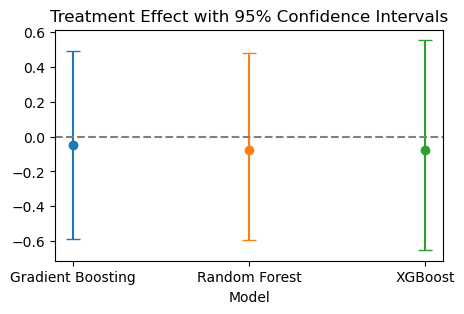

In [48]:
def plot_treatment_effects(results_emp, filename):
    plt.figure(figsize=(5, 3))
    for i, row in results_emp.iterrows():
        plt.errorbar(x=row['Model'], y=row['Estimated Treatment Effect'],
                     yerr=[[row['Estimated Treatment Effect'] - row['95% Confidence Interval Lower Bound']],
                           [row['95% Confidence Interval Upper Bound'] - row['Estimated Treatment Effect']]],
                     fmt='o', capsize=5, label=row['Model'])
    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel('Model')
    plt.title('Treatment Effect with 95% Confidence Intervals')

    # Add suffix _emp to the filename
    filename_with_suffix = filename.replace('.png', '_emp.png')
    plt.savefig(filename_with_suffix)
    plt.show()

# Example usage:
plot_treatment_effects(results_emp_df, 'treatment_effects_plot_emp.png')


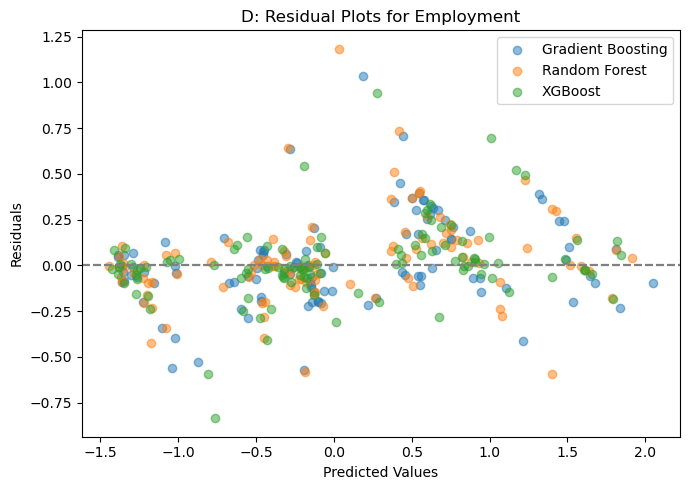

In [49]:
def plot_residuals_emp(y_test_emp, y_star_emp, model_name_emp, ax_emp):
    residuals_emp = y_test_emp - y_star_emp
    ax_emp.scatter(y_star_emp, residuals_emp, alpha=0.5, label=model_name_emp)
    ax_emp.axhline(0, color='gray', linestyle='--')
    ax_emp.set_xlabel('Predicted Values')
    ax_emp.set_ylabel('Residuals')

# Assuming you have three models in the 'models_emp' dictionary
fig_emp, ax_emp = plt.subplots(figsize=(7, 5)) 

for model_name_emp, (outcome_model_emp, treatment_model_emp) in models_emp.items():
    treatment_effect_emp, y_test_emp, y_star_emp, _ = compute_tmle_estimate_emp(df_emp, outcome_model_emp, treatment_model_emp)
    plot_residuals_emp(y_test_emp, y_star_emp, model_name_emp, ax_emp)

ax_emp.set_title('D: Residual Plots for Employment')
ax_emp.legend(title=None) 
plt.tight_layout()
plt.savefig('residual_plots_emp.png')
plt.show()


GDP per capita

In [ ]:
Final

In [50]:
# Assuming overall_cwa_gdp_std is already loaded
df_gdp = cwa_e_gdp_std.copy()

# Define outcome, treatment, and covariates
y_gdp = df_gdp['GDPperCap']
A_gdp = df_gdp['CwACountries']
X_gdp = df_gdp[['ElectAccess', 'Voice and accountability', 'NatRent', 'Pop', 'exports current usd', 'UrbanPopT', 
                'GDSavings', 'imports current usd', 'NetODA', 'ExchangeRate', 'Employment-to-population ratio-15', 
                'Regulatory Quality', 'trade percent of gdp', 'GovtExpd', 'GCapForm', 
                'Inflation consumer prices annual percent', 'Rule of Law', 
                'Government Effectiveness', 'Political Stability and Absence of violence or terrorism', 
                'Control of corruption', 'GDPGrowth', 'FDIInflow', 'CovidDummy']]


In [51]:
def compute_tmle_estimate_gdp(df, outcome_model, treatment_model):
    y_gdp = df['GDPperCap']
    A_gdp = df['CwACountries']
    X_gdp = df[['ElectAccess', 'Voice and accountability', 'NatRent', 'Pop', 'exports current usd', 'UrbanPopT', 
                'GDSavings', 'imports current usd', 'NetODA', 'ExchangeRate', 'Employment-to-population ratio-15', 
                'Regulatory Quality', 'trade percent of gdp', 'GovtExpd', 'GCapForm', 
                'Inflation consumer prices annual percent', 'Rule of Law', 
                'Government Effectiveness', 'Political Stability and Absence of violence or terrorism', 
                'Control of corruption', 'GDPGrowth', 'FDIInflow', 'CovidDummy']]
    P_gdp = df['Propensity Score']

    # Split data for cross-fitting
    X_train_gdp, X_test_gdp, y_train_gdp, y_test_gdp, A_train_gdp, A_test_gdp, P_train_gdp, P_test_gdp = train_test_split(X_gdp, y_gdp, A_gdp, P_gdp, test_size=0.2)

    # Initial Outcome Model
    outcome_model.fit(pd.concat([X_train_gdp, A_train_gdp], axis=1), y_train_gdp)
    y_hat_gdp = outcome_model.predict(pd.concat([X_test_gdp, A_test_gdp], axis=1))

    # Initial Treatment Model
    treatment_model.fit(X_train_gdp, A_train_gdp)
    A_hat_gdp = P_test_gdp  # Use propensity scores directly

    # Compute clever covariate
    clever_covariate_gdp = A_test_gdp - A_hat_gdp

    # Update the initial outcome model
    epsilon_model_gdp = OLS(y_test_gdp, add_constant(clever_covariate_gdp)).fit()
    epsilon_gdp = epsilon_model_gdp.params.iloc[1]  # Use iloc to access by position

    # Update the predicted outcome
    y_star_gdp = y_hat_gdp + epsilon_gdp * clever_covariate_gdp

    # Estimate the treatment effect
    treatment_effect_gdp = np.mean(y_star_gdp[A_test_gdp == 1]) - np.mean(y_star_gdp[A_test_gdp == 0])
    
    # Calculate p-value
    p_value_gdp = epsilon_model_gdp.pvalues.iloc[1]
    
    return treatment_effect_gdp, y_test_gdp, y_star_gdp, p_value_gdp


In [52]:
def bootstrap_tmle_gdp(df, outcome_model, treatment_model, n_iterations=1000):
    bootstrap_estimates_gdp = []
    p_values_gdp = []
    r_squared_values_gdp = []
    rmse_values_gdp = []
    mae_values_gdp = []

    for i in range(n_iterations):
        sample_df_gdp = resample(df)
        treatment_effect_gdp, y_test_sample_gdp, y_star_sample_gdp, p_value_gdp = compute_tmle_estimate_gdp(sample_df_gdp, outcome_model, treatment_model)
        bootstrap_estimates_gdp.append(treatment_effect_gdp)
        p_values_gdp.append(p_value_gdp)
        r_squared_gdp = r2_score(y_test_sample_gdp, y_star_sample_gdp)
        rmse_gdp = np.sqrt(mean_squared_error(y_test_sample_gdp, y_star_sample_gdp))
        mae_gdp = mean_absolute_error(y_test_sample_gdp, y_star_sample_gdp)
        r_squared_values_gdp.append(r_squared_gdp)
        rmse_values_gdp.append(rmse_gdp)
        mae_values_gdp.append(mae_gdp)

    # Calculate the mean and standard error of bootstrap estimates
    bootstrap_mean_gdp = np.mean(bootstrap_estimates_gdp)
    bootstrap_se_gdp = np.std(bootstrap_estimates_gdp)

    # Calculate the 95% confidence interval
    lower_ci_gdp = np.percentile(bootstrap_estimates_gdp, 2.5)
    upper_ci_gdp = np.percentile(bootstrap_estimates_gdp, 97.5)

    # Calculate the mean R-squared, RMSE, and MAE values
    mean_r_squared_gdp = np.mean(r_squared_values_gdp)
    mean_rmse_gdp = np.mean(rmse_values_gdp)
    mean_mae_gdp = np.mean(mae_values_gdp)
    
    # Calculate mean p-value
    mean_p_value_gdp = np.mean(p_values_gdp)

    return {
        'Estimated Treatment Effect': bootstrap_mean_gdp,
        'Bootstrap Standard Error': bootstrap_se_gdp,
        '95% Confidence Interval Lower Bound': lower_ci_gdp,
        '95% Confidence Interval Upper Bound': upper_ci_gdp,
        'Mean R-Squared': mean_r_squared_gdp,
        'Mean RMSE': mean_rmse_gdp,
        'Mean MAE': mean_mae_gdp,
        'Mean P-Value': mean_p_value_gdp
    }


In [53]:
models_gdp = {
    'Gradient Boosting': (GradientBoostingRegressor(n_estimators=100, random_state=42), GradientBoostingClassifier(n_estimators=100, random_state=42)),
    'Random Forest': (RandomForestRegressor(n_estimators=100, random_state=42), RandomForestClassifier(n_estimators=100, random_state=42)),
    'XGBoost': (XGBRegressor(n_estimators=100, random_state=42), XGBClassifier(n_estimators=100, random_state=42))
}

results_gdp = []

for model_name_gdp, (outcome_model_gdp, treatment_model_gdp) in models_gdp.items():
    result_gdp = bootstrap_tmle_gdp(df_gdp, outcome_model_gdp, treatment_model_gdp)
    result_gdp['Model'] = model_name_gdp
    results_gdp.append(result_gdp)

results_gdp_df = pd.DataFrame(results_gdp, columns=[
    'Model', 'Estimated Treatment Effect', 'Bootstrap Standard Error',
    '95% Confidence Interval Lower Bound', '95% Confidence Interval Upper Bound',
    'Mean R-Squared', 'Mean RMSE', 'Mean MAE', 'Mean P-Value'
])

print(results_gdp_df)

               Model  Estimated Treatment Effect  Bootstrap Standard Error  \
0  Gradient Boosting                   -0.381960                  0.230561   
1      Random Forest                   -0.381650                  0.226985   
2            XGBoost                   -0.391142                  0.234413   

   95% Confidence Interval Lower Bound  95% Confidence Interval Upper Bound  \
0                            -0.840689                             0.083240   
1                            -0.835805                             0.043998   
2                            -0.849407                             0.045273   

   Mean R-Squared  Mean RMSE  Mean MAE  Mean P-Value  
0        0.962863   0.182033  0.110618      0.440118  
1        0.955326   0.201286  0.114838      0.428836  
2        0.948111   0.210074  0.106935      0.440480  


In [ ]:
Plotting

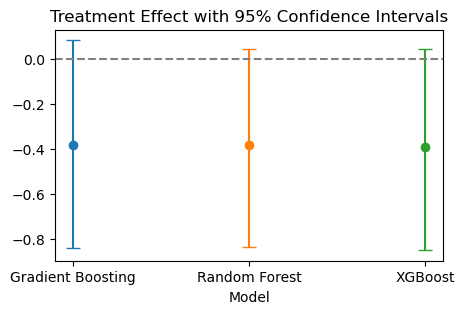

In [54]:
def plot_treatment_effects(results_gdp, filename):
    plt.figure(figsize=(5, 3))
    for i, row in results_gdp.iterrows():
        plt.errorbar(x=row['Model'], y=row['Estimated Treatment Effect'],
                     yerr=[[row['Estimated Treatment Effect'] - row['95% Confidence Interval Lower Bound']],
                           [row['95% Confidence Interval Upper Bound'] - row['Estimated Treatment Effect']]],
                     fmt='o', capsize=5, label=row['Model'])
    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel('Model')
    plt.title('Treatment Effect with 95% Confidence Intervals')

    # Add suffix _gdp to the filename
    filename_with_suffix = filename.replace('.png', '_gdp.png')
    plt.savefig(filename_with_suffix)
    plt.show()

# Example usage:
plot_treatment_effects(results_gdp_df, 'treatment_effects_plot_gdp.png')


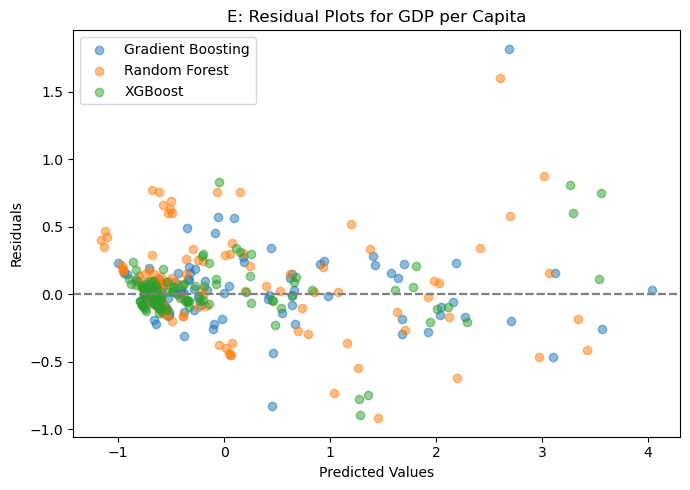

In [55]:
def plot_residuals_gdp(y_test_gdp, y_star_gdp, model_name_gdp, ax_gdp):
    residuals_gdp = y_test_gdp - y_star_gdp
    ax_gdp.scatter(y_star_gdp, residuals_gdp, alpha=0.5, label=model_name_gdp)
    ax_gdp.axhline(0, color='gray', linestyle='--')
    ax_gdp.set_xlabel('Predicted Values')
    ax_gdp.set_ylabel('Residuals')

# Assuming you have three models in the 'models_gdp' dictionary
fig_gdp, ax_gdp = plt.subplots(figsize=(7, 5)) 

for model_name_gdp, (outcome_model_gdp, treatment_model_gdp) in models_gdp.items():
    treatment_effect_gdp, y_test_gdp, y_star_gdp, _ = compute_tmle_estimate_gdp(df_gdp, outcome_model_gdp, treatment_model_gdp)
    plot_residuals_gdp(y_test_gdp, y_star_gdp, model_name_gdp, ax_gdp)

ax_gdp.set_title('E: Residual Plots for GDP per Capita')
ax_gdp.legend(title=None) 
plt.tight_layout()
plt.savefig('residual_plots_gdp.png')
plt.show()


Export

In [ ]:
Final export

In [56]:
# Assuming overall_cwa_expt_std is already loaded
df_expt = cwa_f_expt_std.copy()

# Define outcome, treatment, and covariates
y_expt = df_expt['exports current usd']
A_expt = df_expt['treat']
X_expt = df_expt[['GDPpConstant', 'FDIInflow', 'trade percent of gdp', 'UrbanPopT', 'GDPperCap', 'GDSavings', 
                'ConsumerPrices', 'ElectAccess', 'NatRent', 'FDIGDP', 'GDPGrowth',  
                'ExchangeRate', 'Voice and accountability', 'Inflation consumer prices annual percent', 
                'Employment-to-population ratio-15', 'Control of corruption', 'Regulatory Quality', 
                'Political Stability and Absence of violence or terrorism', 'GovtExpd', 'Rule of Law', 
                'CovidDummy']]


In [57]:
def compute_tmle_estimate_expt(df, outcome_model, treatment_model):
    y_expt = df['exports current usd']
    A_expt = df['treat']
    X_expt = df[['GDPpConstant', 'FDIInflow', 'trade percent of gdp', 'UrbanPopT', 'GDPperCap', 'GDSavings', 
                'ConsumerPrices', 'ElectAccess', 'NatRent', 'FDIGDP', 'GDPGrowth', 
                'ExchangeRate', 'Voice and accountability', 'Inflation consumer prices annual percent', 
                'Employment-to-population ratio-15', 'Control of corruption', 'Regulatory Quality', 
                'Political Stability and Absence of violence or terrorism', 'GovtExpd', 'Rule of Law', 
                'CovidDummy']]
    P_expt = df['Propensity Score']

    # Split data for cross-fitting
    X_train_expt, X_test_expt, y_train_expt, y_test_expt, A_train_expt, A_test_expt, P_train_expt, P_test_expt = train_test_split(X_expt, y_expt, A_expt, P_expt, test_size=0.2)

    # Initial Outcome Model
    outcome_model.fit(pd.concat([X_train_expt, A_train_expt], axis=1), y_train_expt)
    y_hat_expt = outcome_model.predict(pd.concat([X_test_expt, A_test_expt], axis=1))

    # Initial Treatment Model
    treatment_model.fit(X_train_expt, A_train_expt)
    A_hat_expt = P_test_expt  # Use propensity scores directly

    # Compute clever covariate
    clever_covariate_expt = A_test_expt - A_hat_expt

    # Update the initial outcome model
    epsilon_model_expt = OLS(y_test_expt, add_constant(clever_covariate_expt)).fit()
    epsilon_expt = epsilon_model_expt.params.iloc[1]  # Use iloc to access by position

    # Update the predicted outcome
    y_star_expt = y_hat_expt + epsilon_expt * clever_covariate_expt

    # Estimate the treatment effect
    treatment_effect_expt = np.mean(y_star_expt[A_test_expt == 1]) - np.mean(y_star_expt[A_test_expt == 0])
    
    # Calculate p-value
    p_value_expt = epsilon_model_expt.pvalues.iloc[1]
    
    return treatment_effect_expt, y_test_expt, y_star_expt, p_value_expt


In [58]:
def bootstrap_tmle_expt(df, outcome_model, treatment_model, n_iterations=1000):
    bootstrap_estimates_expt = []
    p_values_expt = []
    r_squared_values_expt = []
    rmse_values_expt = []
    mae_values_expt = []

    for i in range(n_iterations):
        sample_df_expt = resample(df)
        treatment_effect_expt, y_test_sample_expt, y_star_sample_expt, p_value_expt = compute_tmle_estimate_expt(sample_df_expt, outcome_model, treatment_model)
        bootstrap_estimates_expt.append(treatment_effect_expt)
        p_values_expt.append(p_value_expt)
        r_squared_expt = r2_score(y_test_sample_expt, y_star_sample_expt)
        rmse_expt = np.sqrt(mean_squared_error(y_test_sample_expt, y_star_sample_expt))
        mae_expt = mean_absolute_error(y_test_sample_expt, y_star_sample_expt)
        r_squared_values_expt.append(r_squared_expt)
        rmse_values_expt.append(rmse_expt)
        mae_values_expt.append(mae_expt)

    # Calculate the mean and standard error of bootstrap estimates
    bootstrap_mean_expt = np.mean(bootstrap_estimates_expt)
    bootstrap_se_expt = np.std(bootstrap_estimates_expt)

    # Calculate the 95% confidence interval
    lower_ci_expt = np.percentile(bootstrap_estimates_expt, 2.5)
    upper_ci_expt = np.percentile(bootstrap_estimates_expt, 97.5)

    # Calculate the mean R-squared, RMSE, and MAE values
    mean_r_squared_expt = np.mean(r_squared_values_expt)
    mean_rmse_expt = np.mean(rmse_values_expt)
    mean_mae_expt = np.mean(mae_values_expt)
    
    # Calculate mean p-value
    mean_p_value_expt = np.mean(p_values_expt)

    return {
        'Estimated Treatment Effect': bootstrap_mean_expt,
        'Bootstrap Standard Error': bootstrap_se_expt,
        '95% Confidence Interval Lower Bound': lower_ci_expt,
        '95% Confidence Interval Upper Bound': upper_ci_expt,
        'Mean R-Squared': mean_r_squared_expt,
        'Mean RMSE': mean_rmse_expt,
        'Mean MAE': mean_mae_expt,
        'Mean P-Value': mean_p_value_expt
    }


In [59]:
models_expt = {
    'Gradient Boosting': (GradientBoostingRegressor(n_estimators=100, random_state=42), GradientBoostingClassifier(n_estimators=100, random_state=42)),
    'Random Forest': (RandomForestRegressor(n_estimators=100, random_state=42), RandomForestClassifier(n_estimators=100, random_state=42)),
    'XGBoost': (XGBRegressor(n_estimators=100, random_state=42), XGBClassifier(n_estimators=100, random_state=42))
}

results_expt = []

for model_name_expt, (outcome_model_expt, treatment_model_expt) in models_expt.items():
    result_expt = bootstrap_tmle_expt(df_expt, outcome_model_expt, treatment_model_expt)
    result_expt['Model'] = model_name_expt
    results_expt.append(result_expt)

results_expt_df = pd.DataFrame(results_expt, columns=[
    'Model', 'Estimated Treatment Effect', 'Bootstrap Standard Error',
    '95% Confidence Interval Lower Bound', '95% Confidence Interval Upper Bound',
    'Mean R-Squared', 'Mean RMSE', 'Mean MAE', 'Mean P-Value'
])

print(results_expt_df)

               Model  Estimated Treatment Effect  Bootstrap Standard Error  \
0  Gradient Boosting                    0.941588                  0.405568   
1      Random Forest                    0.944160                  0.400098   
2            XGBoost                    0.939246                  0.394388   

   95% Confidence Interval Lower Bound  95% Confidence Interval Upper Bound  \
0                             0.212495                             1.825224   
1                             0.235395                             1.781867   
2                             0.259201                             1.775642   

   Mean R-Squared  Mean RMSE  Mean MAE  Mean P-Value  
0        0.558513   0.649246  0.424299      0.000358  
1        0.555645   0.646024  0.424224      0.001443  
2        0.550851   0.634937  0.412319      0.001314  


In [ ]:
Plotting

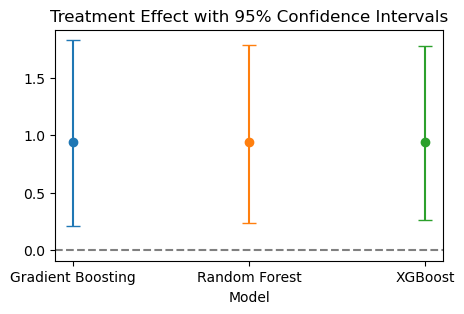

In [60]:
def plot_treatment_effects(results_expt, filename):
    plt.figure(figsize=(5, 3))
    for i, row in results_expt.iterrows():
        plt.errorbar(x=row['Model'], y=row['Estimated Treatment Effect'],
                     yerr=[[row['Estimated Treatment Effect'] - row['95% Confidence Interval Lower Bound']],
                           [row['95% Confidence Interval Upper Bound'] - row['Estimated Treatment Effect']]],
                     fmt='o', capsize=5, label=row['Model'])
    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel('Model')
    plt.title('Treatment Effect with 95% Confidence Intervals')

    # Add suffix _expt to the filename
    filename_with_suffix = filename.replace('.png', '_expt.png')
    plt.savefig(filename_with_suffix)
    plt.show()

# Example usage:
plot_treatment_effects(results_expt_df, 'treatment_effects_plot_expt.png')


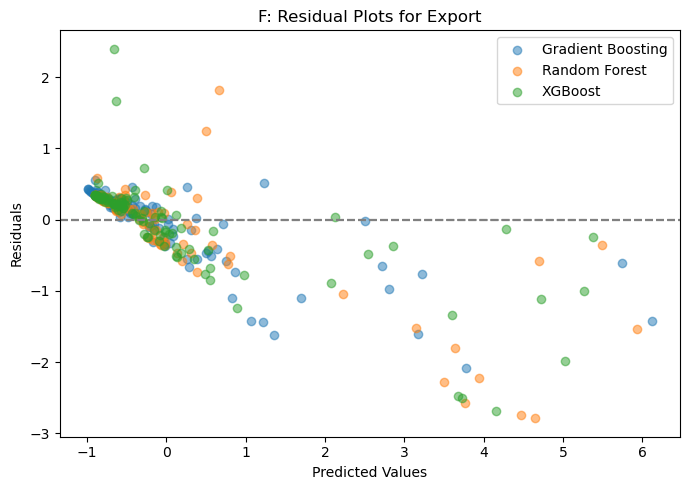

In [61]:
def plot_residuals_expt(y_test_expt, y_star_expt, model_name_expt, ax_expt):
    residuals_expt = y_test_expt - y_star_expt
    ax_expt.scatter(y_star_expt, residuals_expt, alpha=0.5, label=model_name_expt)
    ax_expt.axhline(0, color='gray', linestyle='--')
    ax_expt.set_xlabel('Predicted Values')
    ax_expt.set_ylabel('Residuals')

# Assuming you have three models in the 'models_expt' dictionary
fig_expt, ax_expt = plt.subplots(figsize=(7, 5)) 

for model_name_expt, (outcome_model_expt, treatment_model_expt) in models_expt.items():
    treatment_effect_expt, y_test_expt, y_star_expt, _ = compute_tmle_estimate_expt(df_expt, outcome_model_expt, treatment_model_expt)
    plot_residuals_expt(y_test_expt, y_star_expt, model_name_expt, ax_expt)

ax_expt.set_title('F: Residual Plots for Export')
ax_expt.legend(title=None) 
plt.tight_layout()
plt.savefig('residual_plots_expt.png')
plt.show()


Overall plot for treament effect - Not added

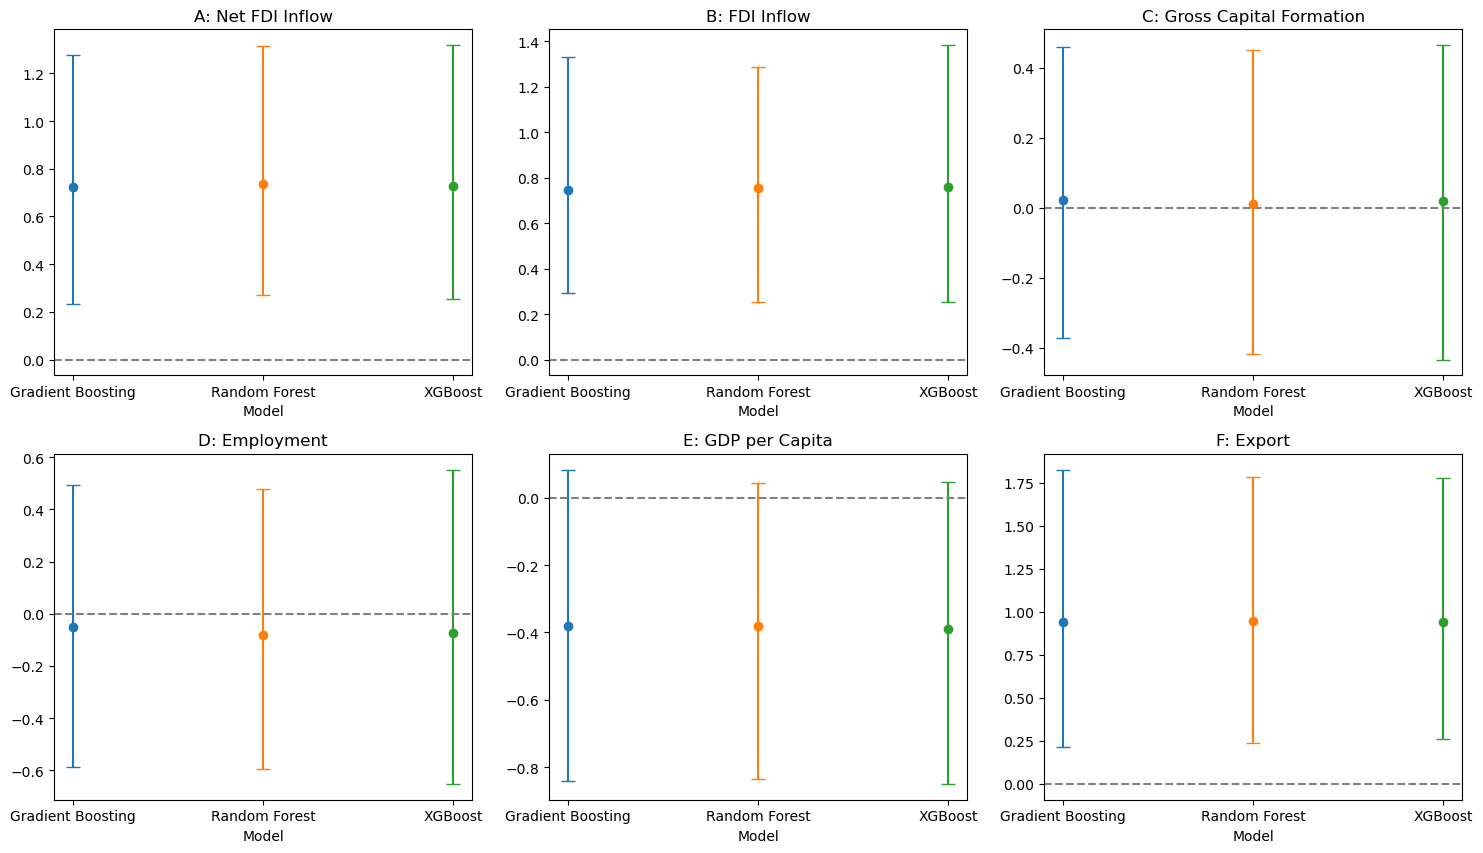

In [62]:
import matplotlib.pyplot as plt

def plot_treatment_effects_subplots(results_dict, filename):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))
    plot_titles = {
        'fdi': 'A: Net FDI Inflow',
        'nada': 'B: FDI Inflow',
        'gcap': 'C: Gross Capital Formation',
        'emp': 'D: Employment',
        'gdp': 'E: GDP per Capita',
        'expt': 'F: Export'
    }

    for ax, (key, (results, fname)) in zip(axes.flatten(), results_dict.items()):
        for i, row in results.iterrows():
            ax.errorbar(x=row['Model'], y=row['Estimated Treatment Effect'],
                        yerr=[[row['Estimated Treatment Effect'] - row['95% Confidence Interval Lower Bound']],
                              [row['95% Confidence Interval Upper Bound'] - row['Estimated Treatment Effect']]],
                        fmt='o', capsize=5, label=row['Model'])
        ax.axhline(0, color='gray', linestyle='--')
        ax.set_xlabel('Model')
        ax.set_title(plot_titles[key])

    # Add overall title and save the plot as a PNG file
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(filename)
    plt.show()

# Example usage:
results_dict = {
    'fdi': (results_fdi_df, 'treatment_effects_plot_fdi.png'),
    'nada': (results_nada_df, 'treatment_effects_plot_nada.png'),
    'gcap': (results_gcap_df, 'treatment_effects_plot_gcap.png'),
    'emp': (results_emp_df, 'treatment_effects_plot_emp.png'),
    'gdp': (results_gdp_df, 'treatment_effects_plot_gdp.png'),
    'expt': (results_expt_df, 'treatment_effects_plot_expt.png')
}

plot_treatment_effects_subplots(results_dict, 'combined_treatment_effects_plot.png')


Residual for overall - not added

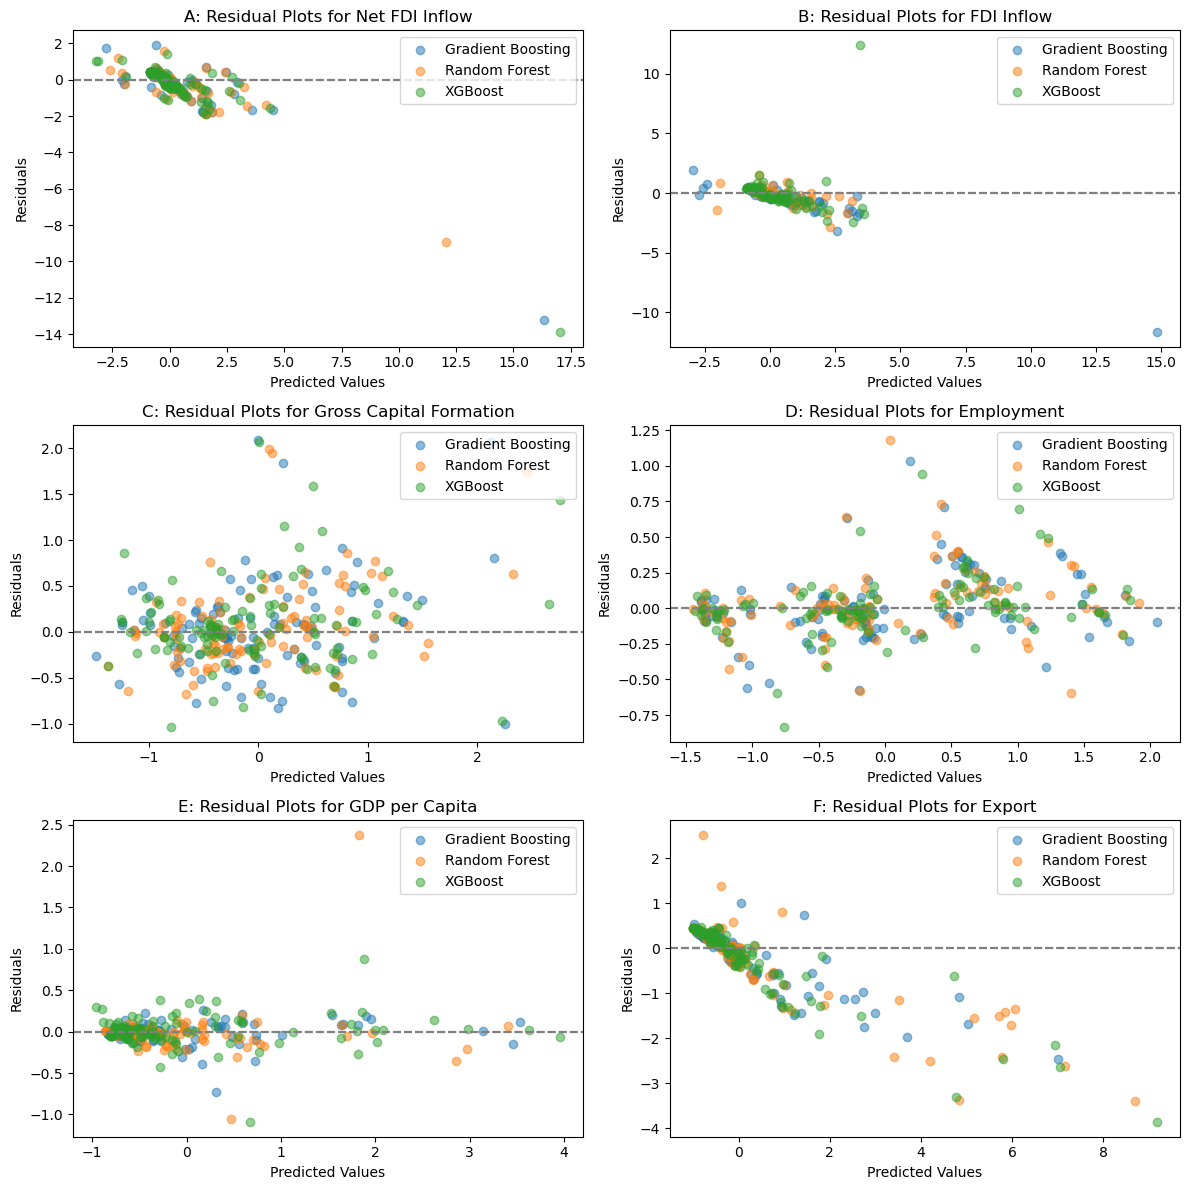

In [63]:
def plot_residuals(y_test, y_star, model_name, ax):
    residuals = y_test - y_star
    ax.scatter(y_star, residuals, alpha=0.5, label=model_name)
    ax.axhline(0, color='gray', linestyle='--')
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Residuals')
    ax.legend(loc='upper right')

# Assuming you have three models in each dictionary
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Plot for FDI
for model_name_fdi, (outcome_model_fdi, treatment_model_fdi) in models_fdi.items():
    treatment_effect_fdi, y_test_fdi, y_star_fdi, _ = compute_tmle_estimate_fdi(df_fdi, outcome_model_fdi, treatment_model_fdi)
    plot_residuals(y_test_fdi, y_star_fdi, model_name_fdi, axs[0, 0])

axs[0, 0].set_title('A: Residual Plots for Net FDI Inflow')

# Plot for Nada
for model_name_nada, (outcome_model_nada, treatment_model_nada) in models_nada.items():
    treatment_effect_nada, y_test_nada, y_star_nada, _ = compute_tmle_estimate_nada(df_nada, outcome_model_nada, treatment_model_nada)
    plot_residuals(y_test_nada, y_star_nada, model_name_nada, axs[0, 1])

axs[0, 1].set_title('B: Residual Plots for FDI Inflow')

# Plot for GCap
for model_name_gcap, (outcome_model_gcap, treatment_model_gcap) in models_gcap.items():
    treatment_effect_gcap, y_test_gcap, y_star_gcap, _ = compute_tmle_estimate_gcap(df_gcap, outcome_model_gcap, treatment_model_gcap)
    plot_residuals(y_test_gcap, y_star_gcap, model_name_gcap, axs[1, 0])

axs[1, 0].set_title('C: Residual Plots for Gross Capital Formation')

# Plot for Employment
for model_name_emp, (outcome_model_emp, treatment_model_emp) in models_emp.items():
    treatment_effect_emp, y_test_emp, y_star_emp, _ = compute_tmle_estimate_emp(df_emp, outcome_model_emp, treatment_model_emp)
    plot_residuals(y_test_emp, y_star_emp, model_name_emp, axs[1, 1])

axs[1, 1].set_title('D: Residual Plots for Employment')

# Plot for GDP
for model_name_gdp, (outcome_model_gdp, treatment_model_gdp) in models_gdp.items():
    treatment_effect_gdp, y_test_gdp, y_star_gdp, _ = compute_tmle_estimate_gdp(df_gdp, outcome_model_gdp, treatment_model_gdp)
    plot_residuals(y_test_gdp, y_star_gdp, model_name_gdp, axs[2, 0])

axs[2, 0].set_title('E: Residual Plots for GDP per Capita')

# Plot for Export
for model_name_expt, (outcome_model_expt, treatment_model_expt) in models_expt.items():
    treatment_effect_expt, y_test_expt, y_star_expt, _ = compute_tmle_estimate_expt(df_expt, outcome_model_expt, treatment_model_expt)
    plot_residuals(y_test_expt, y_star_expt, model_name_expt, axs[2, 1])

axs[2, 1].set_title('F: Residual Plots for Export')

plt.tight_layout()
plt.savefig('residual_plots_combined.png')
plt.show()


Export all result to excel - Table A4

In [64]:
# Save the DataFrames to different sheets in the same Excel file
with pd.ExcelWriter('treatment_effects_result_15.xlsx', engine='xlsxwriter') as writer:
    results_gdp_df.to_excel(writer, sheet_name='GDP', index=False)
    results_emp_df.to_excel(writer, sheet_name='Employment', index=False)
    results_gcap_df.to_excel(writer, sheet_name='Gcap', index=False)
    results_fdi_df.to_excel(writer, sheet_name='FDI', index=False)
    results_nada_df.to_excel(writer, sheet_name='FDINada', index=False)
    results_expt_df.to_excel(writer, sheet_name='Export', index=False)
